<center><h1><b> Analysis of Football Player and Team Match Results Prediction</b></h1></center>

<div style="text-align: center;">
  <b>Department of Computer Science and Engineering, Korea University</b>
  <br><b>Dohyeok Kwon, Junhyeok Kang, Jimin Lee</b></br>
</div>

 
**This Report is for Football Player Analysis and Team Outcome Prediction.**
  
**Before start, we used 2 overall datasets:**

1. Big 5 League(Premier League, Bundesliga, La Liga, Serie A and Ligue 1) FW & MF 2000 soccer players, who played among 2021-2022, 2022-2023, 2023-2024 Season.

  
2. Big 5 League(Premier League, Bundesliga, La Liga, Serie A and Ligue 1) match results (2021-2022, 2022-2023, 2023-2024 Season).
---

## **Why we selected this topic?**
  
  Nowadays, there are so many resources of soccer player datasets, offering a unique analysis and understanding of the factors. A lot of soccer data factors are going detailed. 
    
  With the increasing availability of detailed player metrics, it has become almost essential to analyze high-level soccer data. 

  So, rather than just analyzing simple goal counts and win-loss records, there are several creative ideas to get an advanced insights using basic soccer player & team results datasets.
  
  First, **"Exploring the Correlation between Various Indexes and Goal Index"** can be useful to estimate the goal record based on several correlated indexes. 

  Second, **"Assigning Appropriate Weights to Indexes to Calculate Players' Power Rank"** can also measure the players' abilities entirely based on basic records.

  Lastly, we can also do the **"Predicting Team Match Results Based on Players' Power Rank"** , which can literally predict the team results based on players' power rank based on our weights.

---


## **Table of Contents**

1. [Data Preprocessing & Datasets](#1-data-preprocessing--datasets)
   
2. [Exploring the Correlation between Various Indexes and Goal Index](#2-exploring-the-correlation-between-various-indexes-and-goal-index)
      
3. [Football Player Tier Maker](#3-football-player-tier-maker)
      
4. [Predicting Team Match Results Based on Players' Power Rank](#4-predicting-team-match-results-based-on-players-power-rank)

---


## **1. Data Preprocessing & Datasets**


### **1-1. Player Attributes Dataset**
Dataset source is from [STATHead FBref](https://stathead.com/fbref/).  You can see the raw data record of football players & matches.
  
You can download the complete dataset used for the analysis from the link below:  
[Download the 3years_statistics1.xlsx file](https://docs.google.com/spreadsheets/d/1p4p690VWMjMB_3mkBzbgOi3ZfvBowVF3/edit?usp=drive_link&ouid=109629826928896722483&rtpof=true&sd=true)


#### **1-1-1. Player Attributes Dataset**

  #### 1. General Information (standard)
  | Attribute | Description |
  |-----------|-------------|
  | **Rk** | Rank - The player's rank in the list.(based on xG) |
  | **Player** | Name of the player. |
  | **xG** | Expected Goals - A metric that estimates the quality of goalscoring chances and the likelihood of them being scored. |
  | **Season** | The season in which the data was collected. |
  | **Age** | The player's age. |
  | **Nation** | The player's nationality. |
  | **Team** | The team the player was part of during the season. |
  | **Comp** | Competition - The league or competition in which the player played. |
  | **Pos** | Position - The player's position on the field. |
  | **id** | An identifier for the player. |

  #### 2. Playing Time
  | Attribute | Description |
  |-----------|-------------|
  | **MP** | Matches Played - The number of matches the player appeared in. |
  | **Min** | Minutes Played - The total minutes the player was on the field. |
  | **90s** | Number of 90-minute intervals played (used to normalize statistics per 90 minutes). |
  | **Starts** | Number of matches started. |
  | **Subs** | Number of times substituted on. |
  | **unSub** | Number of matches played without being substituted. |

  #### 3. Expected Goals and Assists
  | Attribute | Description |
  |-----------|-------------|
  | **xG.1** | Expected Goals (another representation or specific scenario). |
  | **npxG** | Non-Penalty Expected Goals - xG excluding penalty kicks. |
  | **xAG** | Expected Assists - A metric that estimates the quality of passing chances created. |
  | **xG+xAG** | Total of Expected Goals and Expected Assists. |
  | **xA** | Expected Assists (same as xAG). |
  | **npxG+xAG** | Non-Penalty Expected Goals plus Expected Assists. |
  | **G-xG** | Goals minus Expected Goals - Difference between actual goals scored and xG. |
  | **np:G-xG** | Non-Penalty Goals minus Expected Goals - Difference between non-penalty goals and npxG. |
  | **A-xAG** | Assists minus Expected Assists - Difference between actual assists and xAG. |
  | **npxG/Sh** | Non-Penalty xG per Shot - Quality of shots excluding penalties. |

  #### 4. Shooting
  | Attribute | Description |
  |-----------|-------------|
  | **Sh** | Shots - Total number of shots taken. |
  | **G/Sh** | Goals per Shot. |
  | **G/SoT** | Goals per Shot on Target. |
  | **SoT** | Shots on Target - Total number of shots on target. |
  | **SoT%** | Shots on Target Percentage. |
  | **Dist** | Average shot distance. |
  | **FK** | Number of free kicks taken. |

  #### 5. Performance
  | Attribute | Description |
  |-----------|-------------|
  | **Gls** | Goals - Total goals scored. |
  | **Ast** | Assists - Total assists. |
  | **G+A** | Goals plus Assists. |
  | **G-PK** | Non-Penalty Goals. |
  | **PK** | Penalties - Total penalties scored. |
  | **PKatt** | Penalty Attempts - Total penalty attempts. |
  | **PKm** | Penalty Misses. |

  #### 6. Touches
  | Attribute | Description |
  |-----------|-------------|
  | **Touches** | Total number of touches. |
  | **Def Pen** | Touches in Defensive Penalty Area. |
  | **Def 3rd** | Touches in Defensive Third. |
  | **Mid 3rd** | Touches in Middle Third. |
  | **Att 3rd** | Touches in Attacking Third. |
  | **Att Pen** | Touches in Attacking Penalty Area. |
  | **Live** | Touches in open play (excluding set-pieces). |

  #### 7. Carries
  | Attribute | Description |
  |-----------|-------------|
  | **Carries** | Total carries (dribbling). |
  | **TotDist_x** | Total Carry Distance - Total distance covered while carrying the ball. |
  | **PrgDist_x** | Progressive Carry Distance - Distance covered toward the opponent’s goal. |
  | **PrgC** | Progressive Carries - Carries that advance the ball significantly towards the opponent’s goal. |
  | **1/3_x** | Carries into the final third. |
  | **CPA** | Carries into the Penalty Area. |
  | **Mis** | Miscontrols - Times the player lost control of the ball. |
  | **Dis** | Dispossessed - Times the player was dispossessed by an opponent. |

  #### 8. Receiving
  | Attribute | Description |
  |-----------|-------------|
  | **Rec** | Total receptions of the ball. |
  | **PrgR** | Progressive Receptions - Receptions of the ball that advance the ball significantly towards the opponent’s goal. |

  #### 9. Passing
  | Attribute | Description |
  |-----------|-------------|
  | **Cmp** | Completed Passes. |
  | **Att** | Pass Attempts. |
  | **Cmp%** | Pass Completion Percentage. |
  | **KP** | Key Passes - Passes leading to a shot. |
  | **1/3_y** | Passes into the final third. |
  | **PPA** | Passes into the Penalty Area. |
  | **CrsPA** | Crosses into the Penalty Area. |
  | **PrgP** | Progressive Passes - Passes that advance the ball significantly towards the opponent’s goal. |
  | **TotDist_y** | Total Pass Distance. |
  | **PrgDist_y** | Progressive Pass Distance. |

---

#### **1-1-2. How these datasets are preprocessed?**
Dataset source is from [STATHead FBref](https://stathead.com/fbref/).

  Actually, The dataset from the FBref website is limited to 200 entries per page. To compile a comprehensive dataset of 6000 rows (2000 players * 3 years),
   
  data from multiple pages were aggregated into CSV files. Four CSV files were created, each focusing on different aspects: xG, Passes, Carries, and Touches.
    
  These files were then merged into a single dataframe using the player's name and season as the key identifiers(to join). 


#### **1-1-3. Code of Preprocessing**


In [1]:
# Install Python packages
!pip install matplotlib seaborn adjustText
!pip install statsmodels

import csv
import pandas as pd

# Load the CSV files
path1 = '3years_xG.csv'
path2 = "3years_touches.csv"
path3 = "3years_carries.csv" 
path4 = "3years_passes.csv"


# read csv files
try:
    df1 = pd.read_csv(path1, error_bad_lines=False)
    df2 = pd.read_csv(path2, error_bad_lines=False)
    df3 = pd.read_csv(path3, error_bad_lines=False)
    df4 = pd.read_csv(path4, error_bad_lines=False)
    
except pd.errors.ParserError as e:
    print(f"Error reading CSV file: {e}")

# columns name strip
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
df4.columns = df4.columns.str.strip()

# To reflect the one rank(based on xG), we have to drop the others
df2 = df2.drop(columns=['Rk', 'Pos'])
df3 = df3.drop(columns=['Rk'])
df4 = df4.drop(columns=['Rk'])

# Merge the dataframes column (based on Player, season, and id) => to evade duplication 
df_merged1 = pd.merge(df1,df2,on=['Player', 'Season', 'id' ],how='inner')

df_merged2 = pd.merge(df_merged1,df3,on=['Player', 'Season', 'id' ],how='inner')

df_merged = pd.merge(df_merged2,df4,on=['Player', 'Season', 'id' ],how='inner')

# Setting Multi-index column names
multi_index_columns = [
    ('standard', 'Rk'),                ('Playing time', 'MP'),               ('Expected', 'xG.1'),
    ('standard', 'Player'),            ('Playing time', 'Min'),              ('Expected', 'npxG'),
    ('standard', 'xG'),                ('Playing time', '90s'),              ('Expected', 'xAG'),
    ('standard', 'Season'),            ('Playing time', 'Starts'),           ('Expected', 'xG+xAG'),
    ('standard', 'Age'),               ('Playing time', 'Subs'),             ('Expected', 'xA'),
    ('standard', 'Nation'),            ('Playing time', 'unSub'),            ('Expected', 'npxG+xAG'),
    ('standard', 'Team'),              ('Shooting', 'Sh'),                   ('Expected', 'G-xG'),
    ('standard', 'Comp'),              ('Shooting', 'G/Sh'),                 ('Expected', 'np:G-xG'),
    ('standard', 'Pos'),               ('Shooting', 'G/SoT'),                ('Expected', 'A-xAG'),
    ('standard', 'id'),                ('Shooting', 'SoT'),                  ('Expected', 'npxG/Sh'),
    ('Touches', 'Touches'),            ('Shooting', 'SoT%'),                 ('Shooting', 'Dist'),
    ('Touches', 'Def Pen'),            ('Shooting', 'FK'),                   ('Performance', 'Gls'),
    ('Touches', 'Def 3rd'),            ('Performance', 'Ast'),               ('Performance', 'G+A'),
    ('Touches', 'Mid 3rd'),            ('Performance', 'G-PK'),              ('Performance', 'PK'),
    ('Touches', 'Att 3rd'),            ('Performance', 'PKatt'),             ('Performance', 'PKm'),
    ('Touches', 'Att Pen'),            ('Touches', 'Live'),                  ('Carries', 'Carries'),
    ('Carries', 'TotDist_x'),          ('Carries', 'PrgDist_x'),             ('Carries', 'PrgC'),
    ('Carries', '1/3_x'),              ('Carries', 'CPA'),                   ('Carries', 'Mis'),
    ('Carries', 'Dis'),                ('Receiving', 'Rec'),                 ('Receiving', 'PrgR'),
    ('Passing', 'Cmp'),                ('Passing', 'Att'),                   ('Passing', 'Cmp%'),
    ('Passing', 'KP'),                 ('Passing', '1/3_y'),                 ('Passing', 'PPA'),
    ('Passing', 'CrsPA'),              ('Passing', 'PrgP'),                  ('Passing', 'TotDist_y'),
    ('Passing', 'PrgDist_y')
]

print(len(multi_index_columns))  # 67 columns

# Rearrange the columns
df_merged = df_merged[[col[1] for col in multi_index_columns]]
df_merged.columns = pd.MultiIndex.from_tuples(multi_index_columns)


# Save the merged dataframe to an Excel file
output_file = '3years_statistics.xlsx'
df_merged.to_excel(output_file, index=True)

print(f"Merged data written to {output_file}")

df_soccerdata = df_merged

/opt/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


67
Merged data written to 3years_statistics.xlsx


In [2]:
# check df_soccerdata columns 
df_soccerdata.columns = [col for col in df_soccerdata.columns.values] 
df_soccerdata.columns

Index([        ('standard', 'Rk'),     ('Playing time', 'MP'),
             ('Expected', 'xG.1'),     ('standard', 'Player'),
          ('Playing time', 'Min'),       ('Expected', 'npxG'),
               ('standard', 'xG'),    ('Playing time', '90s'),
              ('Expected', 'xAG'),     ('standard', 'Season'),
       ('Playing time', 'Starts'),     ('Expected', 'xG+xAG'),
              ('standard', 'Age'),   ('Playing time', 'Subs'),
               ('Expected', 'xA'),     ('standard', 'Nation'),
        ('Playing time', 'unSub'),   ('Expected', 'npxG+xAG'),
             ('standard', 'Team'),         ('Shooting', 'Sh'),
             ('Expected', 'G-xG'),       ('standard', 'Comp'),
             ('Shooting', 'G/Sh'),    ('Expected', 'np:G-xG'),
              ('standard', 'Pos'),      ('Shooting', 'G/SoT'),
            ('Expected', 'A-xAG'),         ('standard', 'id'),
              ('Shooting', 'SoT'),    ('Expected', 'npxG/Sh'),
           ('Touches', 'Touches'),       ('Shooting', '

---
### **1-2. Match results by team from Top 5 leagues (By Crawling)**

  A crawling was conducted from ESPN, we extracted information on match date / opponent / final score / league / match result / home. We looked at the HTML code of the ESPN site and extracted the match date, opponent, final score, and league information. Since game result information was not directly provided, win/loss information was extracted by determining home/away.


  Actually, the code below is for 2023-2024 Seson Crawling, and for 2022-2023 and 2021-2022 Seasons, we may change the link to the Seasons.

#### **1-2-1. Codes of Crawling & Preprocessing**

In [3]:
# Import modules needed for crawling and modules needed to create csv files
import requests
from bs4 import BeautifulSoup
import pandas as pd
from openpyxl import Workbook
# My user-agent header for accessing the ESPN site
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}

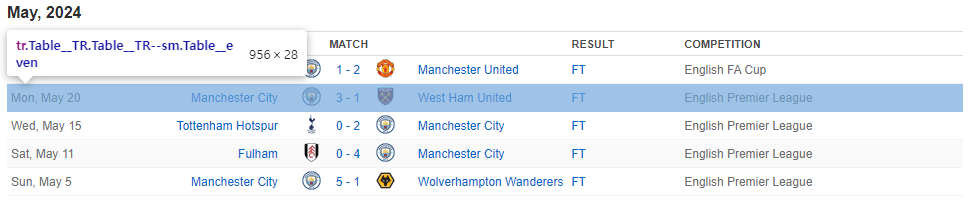

In [4]:
# generate empty lists
pl_data = []
laliga_data = []
seria_data = []
bundes_data = []
ligue1_data = []

# Function to extract game results for each team
def get_team_results(team, team_url):
    response = requests.get(team_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    '''
    In the picture above, the tag for the part corresponding to one match is <tr>.
    class is 'Table__TR Table__TR--sm Table__even'
    Find all information of class 'Table__TR Table__TR--sm Table__even' in <tr> tag
    '''
    matches = soup.find_all('tr', class_='Table__TR Table__TR--sm Table__even')
    # A list that stores information about one game
    match_results = []
    for match in matches:
        # The first information with the 'matchTeams' class in the <div> tag is the match date.
        date = match.find('div', class_='matchTeams').text if match.find('div', class_='matchTeams') else ''
        opponents=[]
        count = 0
        # Process of finding information on the opposing team
        for opponent in match:
            '''    (1)
            Team information for a match is listed in the order of home team - away team,
            Since the tags and classes are the same,
            we need to extract them all and then distinguish between the home team and the away team.
            '''
            opponent = match.find_all('a', class_='AnchorLink Table__Team')
            count = 0
            home = True
            '''    (2)
            If the game is played at the opposing team's home, the opposing team's name appears first,
            so break immediately without repeating the for statement below.,
            If the opposing team is playing an away game, the opposing team's name appears later,
            so increment the count, repeat the for statement below, record the opposing team's name, and then break.
            '''
            for link in opponent:
                if team not in link.text:
                    opponents.append(link.text)
                    break
                count += 1
        # Since the opposing team's name is recorded 5 times, the one in the first index is used.
        op = opponents[0]
        # If the count did not increase in the for statement (2) above, the opposing team's home
        if count == 0:
            home = False

        # List for recording final scores
        scores = []
        '''    (3)
        Since there is multiple pieces of information with the <a> tag and 'AnchorLink' class,
        and the final score is not the first piece of information,
        a method similar to the method used to extract the opposing team's information is used.
        '''
        for result in match:
            result = match.find_all('a', class_='AnchorLink', href=True)
            # Among the information with the <a> tag and the 'AnchorLink' class, the only information with '-' is the final score.
            for link in result:
                if ' - ' in link.text:
                    scores.append(link.text)
        # Since the final score is recorded 5 times, the one in the first index is used.
        res = str(scores[0])
        '''    (4)
        Use the eval method to determine whether you win or not
        Since the final score is in the format of 2 - 1,
        you can determine whether you win by subtracting.
        '''
        win = eval(res)
        r = '.'
        # If it is a home game, if eval(res) is positive, you win.
        if home:
            if win > 0:
                r = 'Win'
            elif win == 0:
                r = 'Draw'
            else:
                r = 'Lose'
        # In the case of an away game, if eval(res) is negative, you win.
        else:
            if win < 0:
                r = 'Win'
            elif win == 0:
                r = 'Draw'
            else:
                r = 'Lose'

        # League classification
        competitions = []
        for comp in match:
            # Find matches only for the top 5 leagues
            comp = match.find_all('td', class_='Table__TD')
            for link in comp:
                if 'English Premier League' in link.text:
                    competitions.append(link.text)
                elif 'Spanish LALIGA' in link.text:
                    competitions.append(link.text)
                elif 'Italian Serie A' in link.text:
                    competitions.append(link.text)
                elif 'German Bundesliga' in link.text:
                    competitions.append(link.text)
                elif 'French Ligue 1' in link.text:
                    competitions.append(link.text)

        # For cup competitions, replace with '.'
        if len(competitions) == 0:
            competitions.append('.')

        # For leagues, use the one in the first index.
        competition = competitions[0]

        # Home/Away Indicating
        h = 'Home'
        if not home:
            h = 'Away'

        # For home games, use eval(res) as is.
        if home:
            if r == 'Win':
                result_ = eval(res)
            elif r == 'Draw':
                result_ = 0
            else:
                result_ =  eval(res)
        # For away games, use eval(res) multiplied by -1
        else:
            if r == 'Win':
                result_ = -eval(res)
            elif r == 'Draw':
                result_ = 0
            else:
                result_ = -eval(res)

        if competition == 'English Premier League':
            pl_data.append({'Team': team, 'Opponent': op, 'Result': result_})
        elif competition == 'Spanish LALIGA':
            laliga_data.append({'Team': team, 'Opponent': op, 'Result': result_})
        elif competition == 'Italian Serie A':
            seria_data.append({'Team': team, 'Opponent': op, 'Result': result_})
        elif competition == 'German Bundesliga':
            bundes_data.append({'Team': team, 'Opponent': op, 'Result': result_})
        elif competition == 'French Ligue 1':
            ligue1_data.append({'Team': team, 'Opponent': op, 'Result': result_})

        # Add all of the above to the match_result list
        match_results.append({
            'Date': date,
            'Team': team,
            'Opponent': op,
            'Score': res,
            'Competition': competition,
            'Result': r,
            'Home': h
        })

    return match_results

# Teams in the 5 major leagues in the 2324 season
team_urls = {
    # EPL
    'AFC Bournemouth': 'https://www.espn.com/soccer/team/results/_/id/349/afc-bournemouth',
    'Arsenal': 'https://www.espn.com/soccer/team/results/_/id/359/arsenal',
    'Aston Villa': 'https://www.espn.com/soccer/team/results/_/id/362/aston-villa',
    'Brentford': 'https://www.espn.com/soccer/team/results/_/id/337/brentford',
    'Brighton & Hove Albion': 'https://www.espn.com/soccer/team/results/_/id/331/brighton-hove-albion',
    'Burnley': 'https://www.espn.com/soccer/team/results/_/id/379/burnley',
    'Chelsea': 'https://www.espn.com/soccer/team/results/_/id/363/chelsea',
    'Crystal Palace': 'https://www.espn.com/soccer/team/results/_/id/384/crystal-palace',
    'Everton': 'https://www.espn.com/soccer/team/results/_/id/368/everton',
    'Fulham': 'https://www.espn.com/soccer/team/results/_/id/370/fulham',
    'Liverpool': 'https://www.espn.com/soccer/team/results/_/id/364/liverpool',
    'Luton Town': 'https://www.espn.com/soccer/team/results/_/id/301/luton-town',
    'Manchester City': 'https://www.espn.com/soccer/team/results/_/id/382/manchester-city',
    'Manchester United': 'https://www.espn.com/soccer/team/results/_/id/360/manchester-united',
    'Newcastle United': 'https://www.espn.com/soccer/team/results/_/id/361/newcastle-united',
    'Nottingham Forest': 'https://www.espn.com/soccer/team/results/_/id/393/nottingham-forest',
    'Sheffield United': 'https://www.espn.com/soccer/team/results/_/id/398/sheffield-united',
    'Tottenham Hotspur': 'https://www.espn.com/soccer/team/results/_/id/367/tottenham-hotspur',
    'West Ham United': 'https://www.espn.com/soccer/team/results/_/id/371/west-ham-united',
    'Wolverhampton Wanderers': 'https://www.espn.com/soccer/team/results/_/id/380/wolverhampton-wanderers',

    # LALIGA
    'Alaves': 'https://www.espn.com/soccer/team/results/_/id/96/alaves',
    'Almeria': 'https://www.espn.com/soccer/team/results/_/id/6832/almeria',
    'Athletic Club': 'https://www.espn.com/soccer/team/results/_/id/93/athletic-club',
    'Atletico Madrid': 'https://www.espn.com/soccer/team/results/_/id/1068/atletico-madrid',
    'Barcelona': 'https://www.espn.com/soccer/team/results/_/id/83/barcelona',
    'Celta Vigo': 'https://www.espn.com/soccer/team/results/_/id/85/celta-vigo',
    'Cadiz': 'https://www.espn.com/soccer/team/results/_/id/3842/cadiz',
    'Getafe': 'https://www.espn.com/soccer/team/results/_/id/2922/getafe',
    'Girona': 'https://www.espn.com/soccer/team/results/_/id/9812/girona',
    'Granada': 'https://www.espn.com/soccer/team/results/_/id/3747/granada',
    'Las Palmas': 'https://www.espn.com/soccer/team/results/_/id/98/las-palmas',
    'Mallorca': 'https://www.espn.com/soccer/team/results/_/id/84/mallorca',
    'Osasuna': 'https://www.espn.com/soccer/team/results/_/id/97/osasuna',
    'Rayo Vallecano': 'https://www.espn.com/soccer/team/results/_/id/101/rayo-vallecano',
    'Real Betis': 'https://www.espn.com/soccer/team/results/_/id/244/real-betis',
    'Real Madrid': 'https://www.espn.com/soccer/team/results/_/id/86/real-madrid',
    'Real Sociedad': 'https://www.espn.com/soccer/team/results/_/id/89/real-sociedad',
    'Sevilla': 'https://www.espn.com/soccer/team/results/_/id/243/sevilla',
    'Valencia': 'https://www.espn.com/soccer/team/results/_/id/94/valencia',
    'Villarreal': 'https://www.espn.com/soccer/team/results/_/id/102/villarreal',

    # SERIA A
    'AC Milan': 'https://www.espn.com/soccer/team/results/_/id/103/ac-milan',
    'AS Roma': 'https://www.espn.com/soccer/team/results/_/id/104/as-roma',
    'Atalanta': 'https://www.espn.com/soccer/team/results/_/id/105/atalanta',
    'Bologna': 'https://www.espn.com/soccer/team/results/_/id/107/bologna',
    'Cagliari': 'https://www.espn.com/soccer/team/results/_/id/2925/cagliari',
    'Empoli': 'https://www.espn.com/soccer/team/results/_/id/2574/empoli',
    'Fiorentina': 'https://www.espn.com/soccer/team/results/_/id/109/fiorentina',
    'Frosinone': 'https://www.espn.com/soccer/team/results/_/id/4057/frosinone',
    'Genoa': 'https://www.espn.com/soccer/team/results/_/id/3263/genoa',
    'Hellas Verona': 'https://www.espn.com/soccer/team/results/_/id/119/hellas-verona',
    'Internazionale': 'https://www.espn.com/soccer/team/results/_/id/110/internazionale',
    'Juventus': 'https://www.espn.com/soccer/team/results/_/id/111/juventus',
    'Lazio': 'https://www.espn.com/soccer/team/results/_/id/112/lazio',
    'Lecce': 'https://www.espn.com/soccer/team/results/_/id/113/lecce',
    'Monza': 'https://www.espn.com/soccer/team/results/_/id/4007/monza',
    'Napoli': 'https://www.espn.com/soccer/team/results/_/id/114/napoli',
    'Salernitana': 'https://www.espn.com/soccer/team/results/_/id/3240/salernitana',
    'Sassuolo': 'https://www.espn.com/soccer/team/results/_/id/3997/sassuolo',
    'Torino': 'https://www.espn.com/soccer/team/results/_/id/239/torino',
    'Udinese': 'https://www.espn.com/soccer/team/results/_/id/118/udinese',

    # BUNDESLIGEA
    '1. FC Heidenheim 1846': 'https://www.espn.com/soccer/team/results/_/id/6418/1-fc-heidenheim-1846',
    '1. FC Union Berlin': 'https://www.espn.com/soccer/team/results/_/id/598/1-fc-union-berlin',
    'Bayer Leverkusen': 'https://www.espn.com/soccer/team/results/_/id/131/bayer-leverkusen',
    'Bayern Munich': 'https://www.espn.com/soccer/team/results/_/id/132/bayern-munich',
    'Borussia Dortmund': 'https://www.espn.com/soccer/team/results/_/id/124/borussia-dortmund',
    'Borussia Monchengladbach': 'https://www.espn.com/soccer/team/results/_/id/268/borussia-monchengladbach',
    'Eintracht Frankfurt': 'https://www.espn.com/soccer/team/results/_/id/125/eintracht-frankfurt',
    'FC Augsburg': 'https://www.espn.com/soccer/team/results/_/id/3841/fc-augsburg',
    'FC Cologne': 'https://www.espn.com/soccer/team/results/_/id/122/fc-cologne',
    'Mainz': 'https://www.espn.com/soccer/team/results/_/id/2950/mainz',
    'RB Leipzig': 'https://www.espn.com/soccer/team/results/_/id/11420/rb-leipzig',
    'SC Freiburg': 'https://www.espn.com/soccer/team/results/_/id/126/sc-freiburg',
    'SV Darmstadt 98': 'https://www.espn.com/soccer/team/results/_/id/3812/sv-darmstadt-98',
    'TSG Hoffenheim': 'https://www.espn.com/soccer/team/results/_/id/7911/tsg-hoffenheim',
    'VfB Stuttgart': 'https://www.espn.com/soccer/team/results/_/id/134/vfb-stuttgart',
    'VfL Bochum': 'https://www.espn.com/soccer/team/results/_/id/121/vfl-bochum',
    'VfL Wolfsburg': 'https://www.espn.com/soccer/team/results/_/id/138/vfl-wolfsburg',
    'Werder Bremen': 'https://www.espn.com/soccer/team/results/_/id/137/werder-bremen',

    # LIGUE 1
    'AS Monaco': 'https://www.espn.com/soccer/team/results/_/id/174/as-monaco',
    'Brest': 'https://www.espn.com/soccer/team/results/_/id/6997/brest',
    'Clermont Foot': 'https://www.espn.com/soccer/team/results/_/id/3171/clermont-foot',
    'Le Havre AC': 'https://www.espn.com/soccer/team/results/_/id/3236/le-havre-ac',
    'Lens': 'https://www.espn.com/soccer/team/results/_/id/175/lens',
    'Lille': 'https://www.espn.com/soccer/team/results/_/id/166/lille',
    'Lorient': 'https://www.espn.com/soccer/team/results/_/id/273/lorient',
    'Lyon': 'https://www.espn.com/soccer/team/results/_/id/167/lyon',
    'Marseille': 'https://www.espn.com/soccer/team/results/_/id/176/marseille',
    'Metz': 'https://www.espn.com/soccer/team/results/_/id/177/metz',
    'Montpellier': 'https://www.espn.com/soccer/team/results/_/id/274/montpellier',
    'Nantes': 'https://www.espn.com/soccer/team/results/_/id/165/nantes',
    'Nice': 'https://www.espn.com/soccer/team/results/_/id/2502/nice',
    'Paris Saint-Germain': 'https://www.espn.com/soccer/team/results/_/id/160/paris-saint-germain',
    'Stade Rennais': 'https://www.espn.com/soccer/team/results/_/id/169/stade-rennais',
    'Stade de Reims': 'https://www.espn.com/soccer/team/results/_/id/3243/stade-de-reims',
    'Strasbourg': 'https://www.espn.com/soccer/team/results/_/id/180/strasbourg',
    'Toulouse': 'https://www.espn.com/soccer/team/results/_/id/179/toulouse'
}

all_team_results = {}

for team, url in team_urls.items():
    results = get_team_results(team, url)
    all_team_results[team] = results

# print
for team, results in all_team_results.items():
    df = pd.DataFrame(results)
    #print(f"\n{team} Match Results:")
    #print(df)
pl_df = pd.DataFrame(pl_data)


In [5]:
for team, results in all_team_results.items():
    df = pd.DataFrame(results)
    # Exclude games other than league games and save them to csv file
    df = df[df['Competition'] != '.']
    file_name = f'{team}_2324.csv'
    df.to_csv(file_name, index=False, encoding = "utf-8-sig")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(team_results):
    df = pd.DataFrame(team_results, columns=['Team', 'Opponent', 'Result'])
    df_pivot = df.pivot_table(index='Team', columns='Opponent', values='Result')
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
    plt.title('Team Results Heatmap')
    plt.show()

pl_df.to_csv('pl_df_2324.csv', index=False, encoding="utf-8-sig")
laliga_df = pd.DataFrame(laliga_data)
laliga_df.to_csv('laliga_df_2324.csv', index=False, encoding="utf-8-sig")
seria_df = pd.DataFrame(seria_data)
seria_df.to_csv('seria_df_2324.csv', index=False, encoding="utf-8-sig")
bundes_df = pd.DataFrame(bundes_data)
bundes_df.to_csv('bundes_df_2324.csv', index=False, encoding="utf-8-sig")
ligue1_df = pd.DataFrame(ligue1_data)
ligue1_df.to_csv('ligue1_df_2324.csv', index=False, encoding="utf-8-sig")

#### **1-2-2. Combine Seperated .csv files by League**

In [ ]:
# Import pandas and os module to handle csv files and dataset
import pandas as pd
import os

# Directory path where CSV files are saved
directory_path = '/content/'

# Read all CSV files in one list
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Sort files by league
pl_files = []
laliga_files = []
seria_files = []
bundes_files = []
ligue1_files = []

for file in csv_files:
    if file.startswith('/content/pl'):
        pl_files.append(os.path.join(directory_path, file))
    elif file.startswith('/content/laliga'):
        laliga_files.append(os.path.join(directory_path, file))
    elif file.startswith('/content/seria'):
        seria_files.append(os.path.join(directory_path, file))
    elif file.startswith('/content/bundes'):
        bundes_files.append(os.path.join(directory_path, file))
    elif file.startswith('/content/ligue1'):
        ligue1_files.append(os.path.join(directory_path, file))


# Generate empty DataFrame
pl_df = pd.DataFrame()
laliga_df = pd.DataFrame()
seria_df = pd.DataFrame()
bundes_df = pd.DataFrame()
ligue1_df = pd.DataFrame()

# Read each CSV file and add it to DataFrame
for file in pl_files: # for PL
    df = pd.read_csv(file)
    pl_df = pd.concat([pl_df, df], ignore_index=True)

for file in laliga_files: # for LaLiga
    df = pd.read_csv(file)
    laliga_df = pd.concat([laliga_df, df], ignore_index=True)

for file in seria_files: # for Serie A
    df = pd.read_csv(file)
    seria_df = pd.concat([seria_df, df], ignore_index=True)

for file in bundes_files: # for Bundesliga
    df = pd.read_csv(file)
    bundes_df = pd.concat([bundes_df, df], ignore_index=True)

for file in ligue1_files: # for Ligue1
    df = pd.read_csv(file)
    ligue1_df = pd.concat([ligue1_df, df], ignore_index=True)

# Save DataFrame for each league in csv file to backup
pl_df.to_csv('n_pl_output.csv', index=False)
laliga_df.to_csv('n_laliga_output.csv', index=False)
seria_df.to_csv('n_seria_output.csv', index=False)
bundes_df.to_csv('n_bundes_output.csv', index=False)
ligue1_df.to_csv('n_ligue1_output.csv', index=False)

---

## **2. Exploring the Correlation between Various Indexes and Goal Index**



### **2-1. The relation between Progressive Carries and Touches**
  
  Before estimating the goal index, we wrote a simple code to examine the correlation between progressive carries and touches.

##### Correlation between Progressive Carries & Touches Code

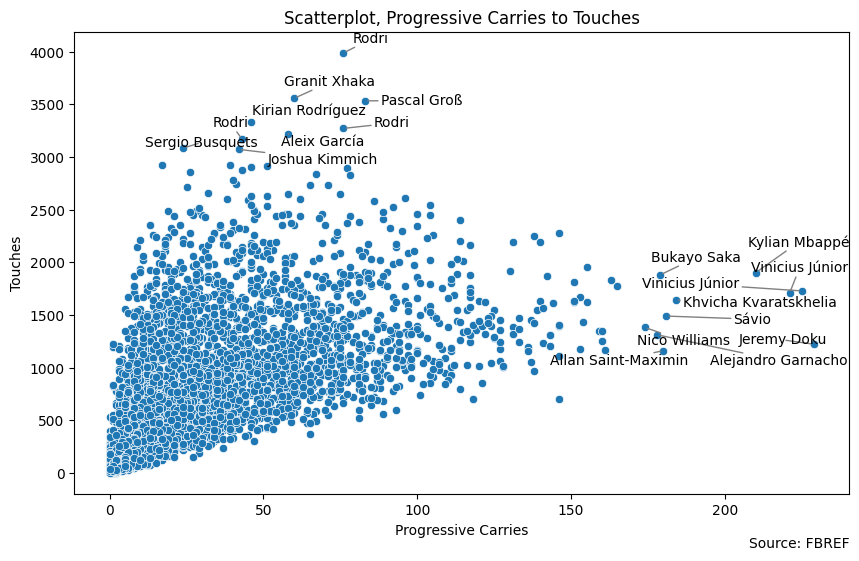

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# To make multiindex to single index 
df_single_index = df_soccerdata.copy()
df_single_index.columns = ['_'.join(col).strip() for col in df_single_index.columns.values]
# For example, if multiindex is ('total','PrgP'), 
# You can access it to total_PrgP. 


# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_single_index, x='Carries_PrgC', y='Touches_Touches')

# If PrgC > 170, Touches > 3000, then annotate the player name
texts = [] 
for i, row in df_single_index.iterrows():
    if row['Carries_PrgC'] > 170 or row['Touches_Touches'] > 3000:
        texts.append(plt.text(row['Carries_PrgC'], row['Touches_Touches'], row['standard_Player']))


adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))


plt.xlabel('Progressive Carries')
plt.ylabel('Touches')
plt.title('Scatterplot, Progressive Carries to Touches')
plt.figtext(0.9, 0.02, 'Source: FBREF', horizontalalignment='right')

plt.show()


In [196]:
# This function calculates the correlation coefficient
correlation = df_single_index['Carries_PrgC'].corr(df_single_index['Touches_Touches'])
print(f"Correlation coefficient : {correlation}")

Correlation coefficient : 0.6366779146157866


#### 💡 **Insight**

  From scatterplot above, we can infer that there is a slight positive association between touches and progressive carries. 
  
  Not sure if there is correlation between the metrics, so a linear model and correlation coefficient is best to determine if that is true.
  
  Actually, we can observe that the Correlation coefficient is approximately 0.637, and this is pretty correlated. (the range of correlation coefficient is -1 to 1.)
  
  For details,
  
  1. Players like Rodri, Sergio Busquets, and Joshua Kimmich tend to have high touches but moderate progressive carries, 

  indicating their role in maintaining possession and distributing the ball rather than driving it forward themselves.

  2. Wingers and Attacking Midfielders: Players like Kylian Mbappé, Vinícius Júnior, and Jeremy Doku have high progressive carries and high touches, 
  
  which aligns with their roles in advancing the ball into attacking positions.

--- 

   

  ### **2-2. The relation between Assistings and Goals**
  
  One more time, we wrote a simple code to examine the correlation between Assistings and Goals.


##### Correlation between Performance_Ast & Goals Code

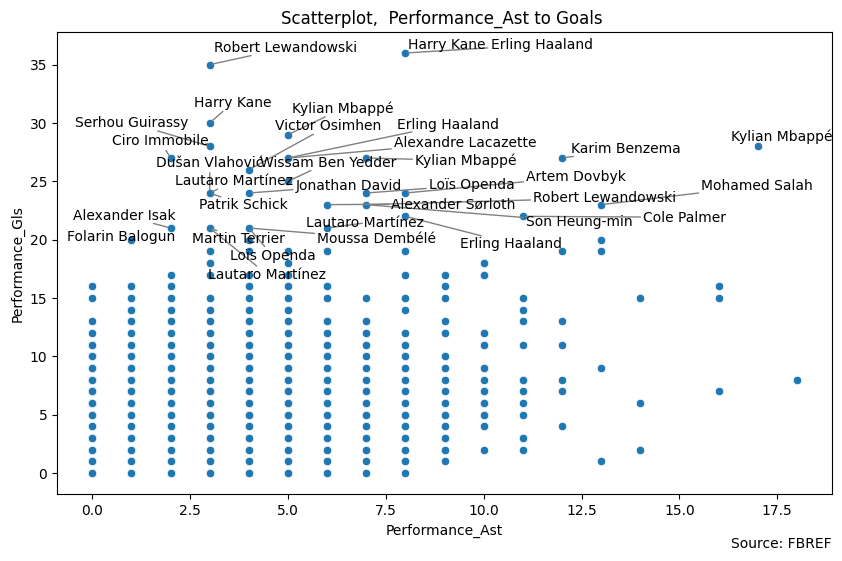

In [197]:
# The correlation between Performance_Ast and Goals 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# To make multiindex to single index 
df_single_index = df_soccerdata.copy()
df_single_index.columns = ['_'.join(col).strip() for col in df_single_index.columns.values]
# for example, if multiindex is ('total','PrgP'), 
# You can access it to total_PrgP. 

# 산점도 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_single_index, x='Performance_Ast', y='Performance_Gls')

# If Playing time_Min > 2500, Touches > 3000 => Add a label
texts = [] 
for i, row in df_single_index.iterrows():
    if row['Performance_Gls'] > 20:
        texts.append(plt.text(row['Performance_Ast'], row['Performance_Gls'], row['standard_Player']))

# To prevent text overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))

# Add labels and title
plt.xlabel('Performance_Ast')
plt.ylabel('Performance_Gls')
plt.title('Scatterplot,  Performance_Ast to Goals ') 
plt.figtext(0.9, 0.02, 'Source: FBREF', horizontalalignment='right')

plt.show()


#### 💡 **Insight**

  The plot is dense near the origin, indicating that most players have relatively low assists and goals.
  
  Overall, while exceptional players (such as Mbappe, Salah) can achieve high numbers in both goals and assists,
  
  the scatter plot shows that there is no strong overall correlation between these two metrics across the entire player dataset. (It is widely scattered.)


---


  ### **2-3. Exploring the Correlation between Various Indexes and Goal Index**
  
  Finally, we examined the correlation between Various Indexes and Goal Index.
  
  Also, we have done Ordinary Least Squares(OLS) model to make a regression model. 
  

#### Correlation between Various Indexes and Goal Index Code

In [198]:
# Analyzes the correlation between the various indexes and goal index   

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sm_oi
import seaborn as sns
import matplotlib.pyplot as plt

subset_columns = [
    'Touches_Touches', 'Playing time_Min',
    'Expected_xAG', 'standard_xG', 'Shooting_Sh', 'Shooting_SoT','Performance_Gls', 
    'Performance_Ast', 'Carries_Carries', 
    'Carries_PrgC', 'Receiving_Rec', 'Passing_Cmp', 'Passing_KP'
]
subset = df_single_index[subset_columns]
subset = subset.fillna(0)


print(f"Number of rows in subset: {len(subset)}") #Number of rows in subset: 5919
 
# Choose the rows that have more than 40 minutes of playing time(to have more accurate data)

subset = subset[(subset['Playing time_Min'] >= 40) ] #Number of rows in subset: 4529  => 1390 deleted
print(f"Number of rows in subset: {len(subset)}")

# independent variable(X) and dependent variable(y)
X = subset.drop(columns=['Performance_Gls'])
y = subset['Performance_Gls']

# add constant to X
X = sm.add_constant(X)

# Fit the Ordinary Least Squares(OLS) model - Calculate the VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [sm_oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


# First step: Calculate the VIF
vif = calculate_vif(X)
print(vif)

# Second step: Remove the variable with the highest VIF value
# Remove the variable with the highest VIF value until all VIF values are less than 10
while vif['VIF'].max() > 10:
    max_vif_var = vif.loc[vif['VIF'] == vif['VIF'].max(), 'Variable'].values[0]
    print(f'Removing {max_vif_var} with VIF = {vif["VIF"].max()}')
    X = X.drop(columns=[max_vif_var])
    vif = calculate_vif(X)

print('------------ FINAL VIFs -------------')
print(vif)


# Fit the Ordinary Least Squares(OLS) model
fit2 = sm.OLS(y, X).fit()
print(fit2.summary())


# Correlation matrix visualization
def plot_correlation(df):
    corr = df.corr()
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Selected Predictor Variables')
    plt.show()


Number of rows in subset: 5919
Number of rows in subset: 4529
            Variable         VIF
0              const    3.315823
1    Touches_Touches  133.457691
2   Playing time_Min   17.062711
3       Expected_xAG   12.267939
4        standard_xG    8.068058
5        Shooting_Sh   17.299904
6       Shooting_SoT   14.375253
7    Performance_Ast    3.884248
8    Carries_Carries   33.823626
9       Carries_PrgC    3.546672
10     Receiving_Rec   90.147430
11       Passing_Cmp  101.321153
12        Passing_KP   10.330604
Removing Touches_Touches with VIF = 133.45769110273403
Removing Receiving_Rec with VIF = 88.32829416708529
Removing Carries_Carries with VIF = 27.471867297897564
Removing Shooting_Sh with VIF = 15.605895152628719
Removing Expected_xAG with VIF = 12.140352127244784
------------ FINAL VIFs -------------
           Variable       VIF
0             const  3.280264
1  Playing time_Min  5.655510
2       standard_xG  6.908948
3      Shooting_SoT  8.501595
4   Performance_Ast  2.

  #### **📝Explanation & Model Summary**

  First of all, we should know the several important statistical numerics through the model summary. 

  1. VIF : It is known that if the value of VIF is more than 10, it is not really correlated with the dependent variable (Performance_Gls).
  - So, we deleted some values which VIF value is high. 

  2. R-squared : 0.883 - This value indicates that the model explains 88.3% of the variability in the dependent variable (Performance_Gls).
    
  3. F-statistic : 4876 - The value is very high, indicating that the model is statistically significant.
    
  4. Regression Coefficients
             
      4-1. Intercept: -0.2317 (p < 0.001 -> statistically significant)
      - The intercept represents the expected value of goals when all independent variables are zero. The p-value is 0.000.(high statistical significance)

      4-2. Playing time_Min: -0.0004 (p < 0.001 -> statistically significant)
      - As the playing time (in minutes) increases, the number of goals slightly decreases. 

      4-3. standard_xG: 0.7638 (p < 0.001 -> statistically significant)
      - When expected goals (xG) increase by 1 unit, the actual goals increase by an average of 0.7638. 

      4-4.Shooting_SoT: 0.1440 (p < 0.001 -> statistically significant)
      - When the number of shots on target (SoT) increases by 1 unit, the number of goals increases by an average of 0.1440. 

      4-5. Performance_Ast: -0.0215 (p = 0.153)
      - The number of assists slightly decreases the number of goals, but this is not statistically significant with a p-value of 0.153.
      
      - As we have already seen this correlation between Assists and Goals above, we can double-check that there are no statistical correlation between Assists and Goals. 

      4-6. Carries_PrgC: -0.0060 (p < 0.001 -> statistically significant)
      - As the number of progressive carries increases, the number of goals slightly decreases. 

      4-7. Passing_Cmp: 0.0006 (p < 0.001 -> statistically significant)
      - As the number of completed passes increases, the number of goals slightly increases. 

      4-8. Passing_KP: 0.0064 (p = 0.015 -> statistically significant)
      - As the number of key passes increases, the number of goals slightly increases. 
        
        
        /
      
   5. Residual Analysis

      5-1. Omnibus: 466.251, Prob (Omnibus): 0.000
      - High Omnibus. Residuals do not follow a normal distribution.

      5-2. Durbin-Watson: 1.962
      - Durbin-Watson measures the autocorrelation of residuals.
        
      - A value close to 2 indicates no autocorrelation, so a value of 1.962 indicates almost no autocorrelation.


#### **Summary**

##### - Model Explanatory Power
- The model explains 88.3% of the variability in the dependent variable (Performance_Gls), which indicates high-powered explanation.

##### - Significance of Coefficients
- `standard_xG`, `Shooting_SoT`, `Passing_Cmp`, and `Passing_KP` have significant impacts on the number of goals and are statistically significant.
- `Playing time_Min` also has a significant impact but in an unexpected direction (as playing time increases, goals decrease).
- `Performance_Ast` is not statistically significant.

##### - Residual Normality
- There is a possibility that residuals do not follow a normal distribution.

##### - Autocorrelation of Residuals
- The Durbin-Watson value of 1.962 indicates alomst no autocorrelation of residuals.



    


  #### **Correlation Matrix of subsets**

  We tried to draw the correlation matrix for the given subsets for visualization. 
  
  For Performance_Gls, we can see that there are strong correlation among expected Goals, Shootings, and Shoots on Targets(유효슈팅).


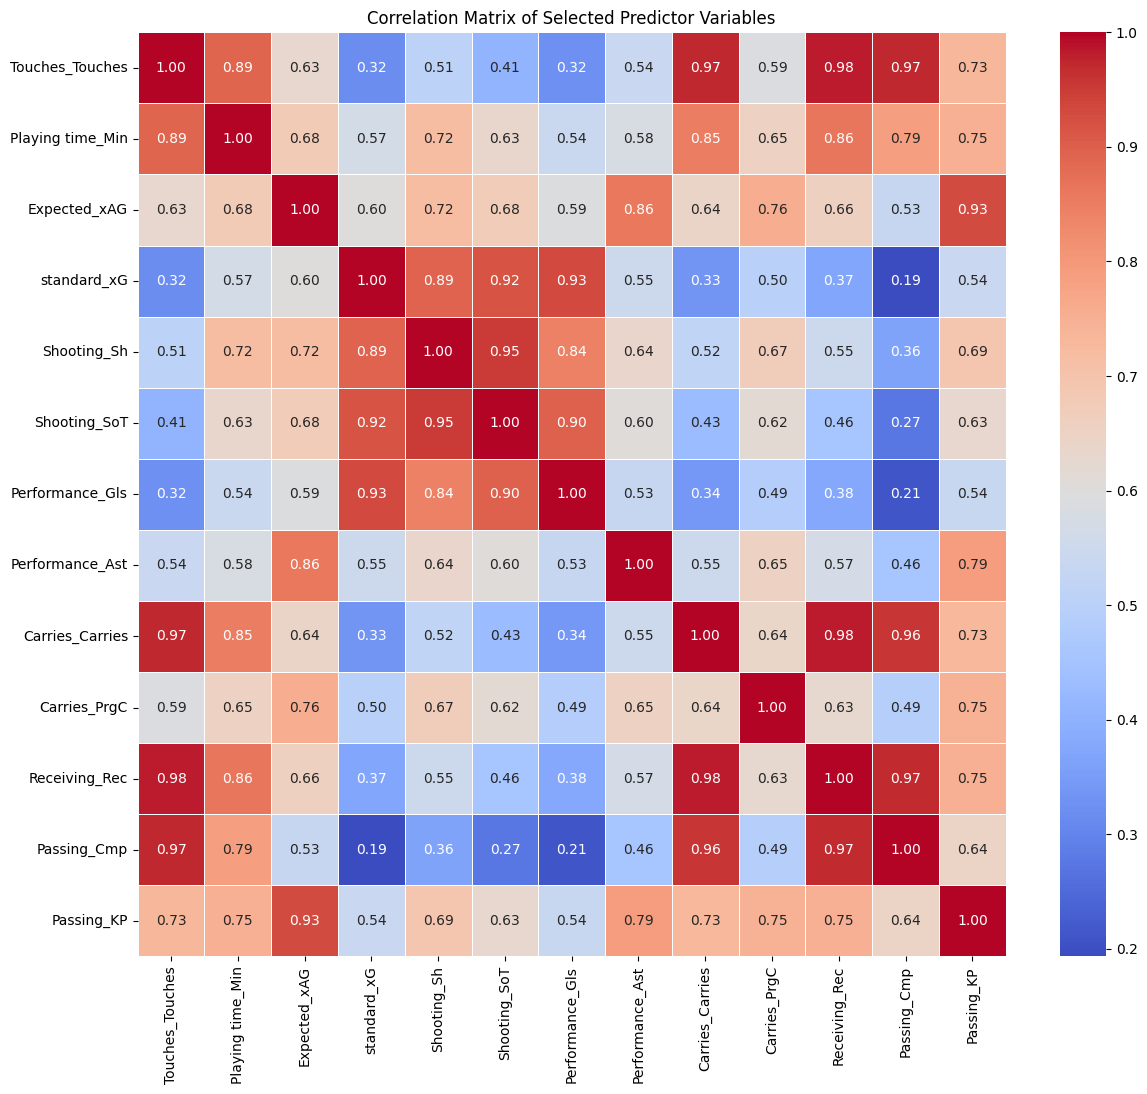

In [199]:
plot_correlation(subset)

---

  ### **2-4. Comparing Linear, Ridge, Lasso, Random Forest Regression**

  We compared Linear, Ridge, Lasso, Random Forest Regression, to choose the most proper model. 

  The executed results(Mean R^2 Score, Standard Deviation of R^2 Scores) are in below.
  

In [200]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# 교차 검증을 위한 KFold 초기화
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 성능 평가
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"{name} Cross-Validation R^2 Scores:", scores)
    print(f"Mean R^2 Score: {np.mean(scores)}")
    print(f"Standard Deviation of R^2 Scores: {np.std(scores)}")
    print()



Linear Regression Cross-Validation R^2 Scores: [0.88849988 0.87914322 0.88605771 0.89246147 0.86114548]
Mean R^2 Score: 0.8814615519842743
Standard Deviation of R^2 Scores: 0.011043352187829283

Ridge Regression Cross-Validation R^2 Scores: [0.88849991 0.87914609 0.88605662 0.89245864 0.861148  ]
Mean R^2 Score: 0.8814618503126681
Standard Deviation of R^2 Scores: 0.011041655153185748

Lasso Regression Cross-Validation R^2 Scores: [0.88836168 0.88000279 0.88543572 0.89118524 0.86209184]
Mean R^2 Score: 0.881415452013983
Standard Deviation of R^2 Scores: 0.01034658240743372

Random Forest Regressor Cross-Validation R^2 Scores: [0.8819724  0.86145843 0.87313288 0.88607321 0.83890102]
Mean R^2 Score: 0.8683075889580593
Standard Deviation of R^2 Scores: 0.0169545568596846



---
  ### **2.5. Lasso Regression Analysis**


   #### - **R² score explanation**
  
  The average R² score indicates how well the model explains the data, and the standard deviation reflects the stability of the model's performance.
  
  A lower standard deviation indicates higher consistency in the model's predictions.

  Based on the given results, **Lasso Regression** has the highest average R² score and the lowest standard deviation, making it the most stable model.
  
  
  
  So, After selecting this model, we can get the performances of Lasso Regression model and overall Lasso Regression Coefficients.




In [201]:
# Lasso Regression model training and evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# model prediction
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# model evaluation
print("Train R^2 Score:", r2_score(y_train, y_pred_train))
print("Test R^2 Score:", r2_score(y_test, y_pred_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))

# print the coefficients
coefficients = lasso.coef_
feature_names = X.columns
print("\n------------------------------\n")
print("Lasso Regression Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


Train R^2 Score: 0.8813272998388055
Test R^2 Score: 0.8883616791974184
Mean Squared Error: 1.7762814574051806
Mean Absolute Error: 0.9300046432836778

------------------------------

Lasso Regression Coefficients:
const: 0.0
Playing time_Min: -0.0003139521416968339
standard_xG: 0.7270231922879359
Shooting_SoT: 0.15056015557626679
Performance_Ast: -0.0
Carries_PrgC: -0.005140914799489962
Passing_Cmp: 0.0005203536548782441
Passing_KP: 0.0032771895306538314


  #### - **How the model is properly standarized?**
  
  The code below calculates residuals, fitted values, standardized residuals, and leverage for a regression model.

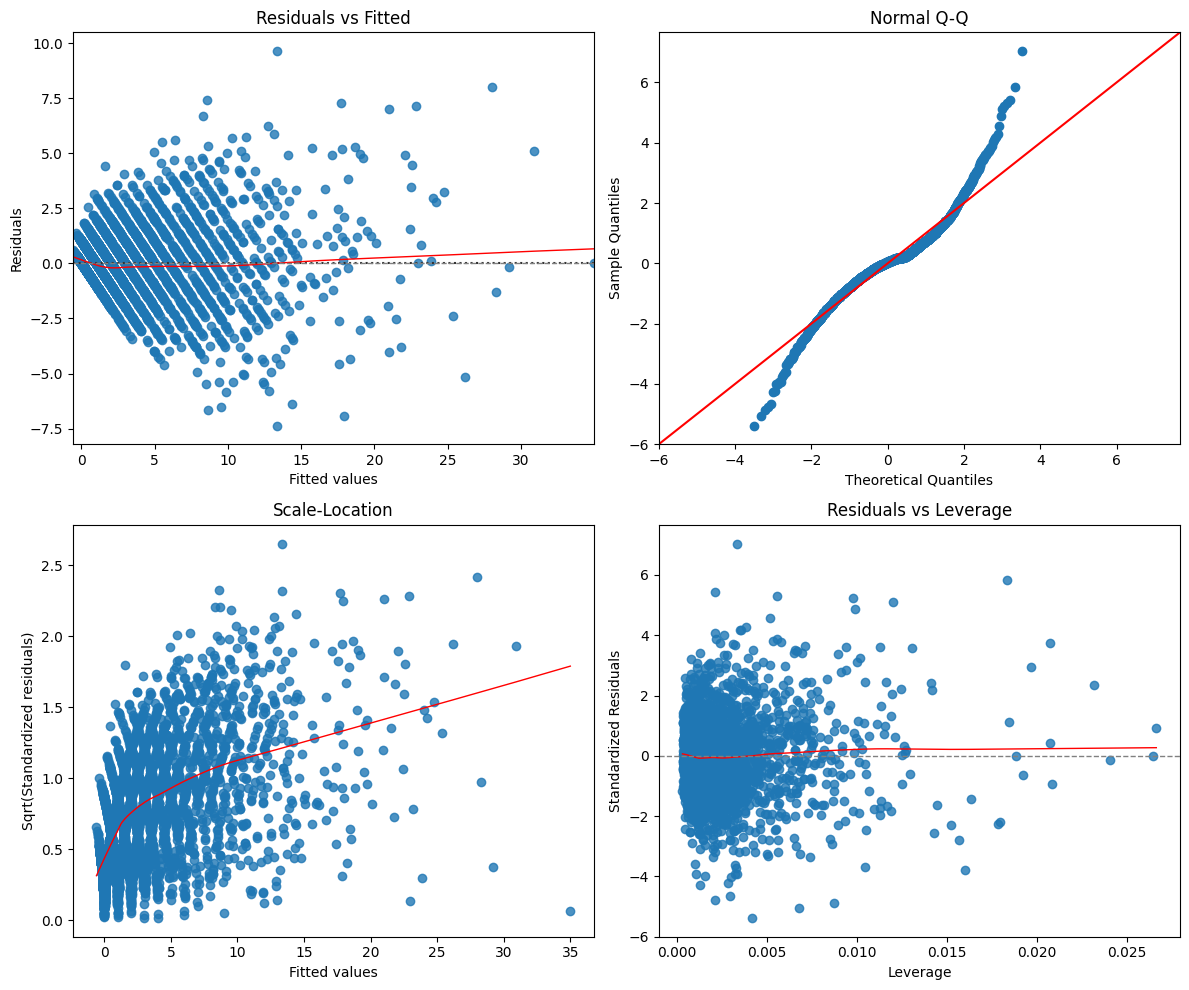

In [202]:
# Residual analysis
residuals = fit2.resid
fitted = fit2.fittedvalues
standardized_residuals = residuals / np.std(residuals)
influence = fit2.get_influence()
leverage = influence.hat_matrix_diag


plt.figure(figsize=(12, 10))

# Residuals vs Fitted
plt.subplot(2, 2, 1)
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)

# Normal Q-Q
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

# Scale-Location
plt.subplot(2, 2, 3)
sns.regplot(x=fitted, y=np.sqrt(np.abs(standardized_residuals)), lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Standardized residuals)')
plt.title('Scale-Location')

# Residuals vs Leverage
plt.subplot(2, 2, 4)
sns.regplot(x=leverage, y=standardized_residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage')
plt.axhline(0, color='grey', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.show()


#### - **Lasso Regression model visualization**

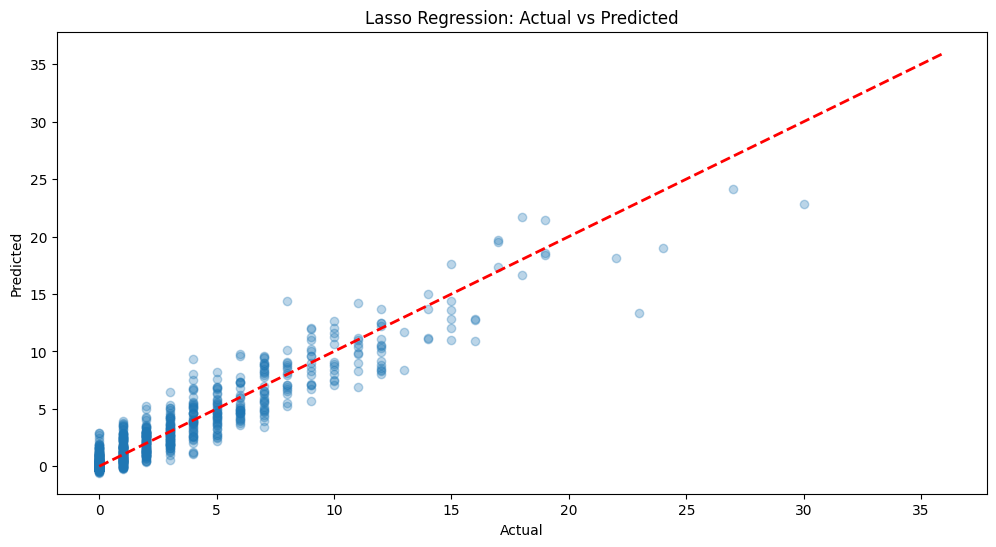

In [203]:
# Lasso Regression model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Predictions
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Visualize the actual vs predicted values

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

  #### 💡 **Insights & Limitations**
  
  - The plot shows a scatter plot comparing the actual values (x-axis) and predicted values (y-axis) from the Lasso Regression model.

  - The red line means the ideal line, where predicted values perfectly match the actual values.
  
  - In conclusion, the seleceted Lasso Regression model demonstrates a strong correlation between prediction and actual onesm but there are still areas where improvements could be made to handle outliers or reduce prediction errors, which is the out of red line.

---

## **3. Football Player Tier Maker**




* Using recent 3 season data of football players, we make tier maker

In [204]:
!pip install matplotlib seaborn adjustText
!pip install statsmodels
!pip install scikit-learn

#### Preparation) Data Preprocessing
The overall preprocessing process is as same as the prior one, but in this part, we din't use the multi index. 

In [205]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV files with error handling
path1 = '3years_xG.csv'
path2 = "3years_touches.csv"
path3 = "3years_carries.csv" 
path4 = "3years_passes.csv"


# Try reading the CSV files with error handling to identify issues
# CSV 파일 읽기 (오류가 있는 줄 건너뛰기)
try:
    df1 = pd.read_csv(path1, on_bad_lines='skip')
    df2 = pd.read_csv(path2, on_bad_lines='skip')
    df3 = pd.read_csv(path3, on_bad_lines='skip')
    df4 = pd.read_csv(path4, on_bad_lines='skip')
    print("CSV files read successfully")
    
except pd.errors.ParserError as e:
    print(f"Error reading CSV file: {e}")

# Clean up column names by removing leading/trailing whitespaces and renaming appropriately
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
df4.columns = df4.columns.str.strip()

#To reflect the one rank, we have to drop the others
df1 = df1.drop(columns=['Rk'])
df2 = df2.drop(columns=['Rk', 'Pos'])
df3 = df3.drop(columns=['Rk'])
df4 = df4.drop(columns=['Rk'])

# Merge the dataframes column (based on Player, season, and id) => to evade duplication 
df_merged1 = pd.merge(df1,df2,on=['Player', 'Season', 'id' ],how='inner')
print(1)
df_merged2 = pd.merge(df_merged1,df3,on=['Player', 'Season', 'id' ],how='inner')
print(2)
df_merged = pd.merge(df_merged2,df4,on=['Player', 'Season', 'id' ],how='inner')

print(df_merged.head())


CSV files read successfully
1
2
               Player    xG     Season   Age   Nation             Team  \
0  Robert Lewandowski  33.2  2021-2022  32.0   pl POL    Bayern Munich   
1          Harry Kane  30.6  2023-2024  30.0  eng ENG    Bayern Munich   
2      Erling Haaland  29.2  2023-2024  23.0   no NOR  Manchester City   
3      Erling Haaland  28.4  2022-2023  22.0   no NOR  Manchester City   
4     Folarin Balogun  26.6  2022-2023  21.0   us USA            Reims   

                 Comp  MP     Min   90s  ...    Cmp    Att  Cmp%    KP  1/3_y  \
0       de Bundesliga  34  2946.0  32.7  ...  575.0  767.0  75.0  37.0   38.0   
1       de Bundesliga  32  2839.0  31.5  ...  474.0  664.0  71.4  31.0   66.0   
2  eng Premier League  31  2552.0  28.4  ...  295.0  388.0  76.0  29.0   16.0   
3  eng Premier League  35  2769.0  30.8  ...  360.0  500.0  72.0  29.0   14.0   
4          fr Ligue 1  37  2999.0  33.3  ...  408.0  582.0  70.1  36.0   28.0   

    PPA  CrsPA   PrgP  TotDist_y  Pr

---

### **3-1. Motivation for Creating the Tier Maker**
The motivation behind creating the Tier Maker stems from the inherent ambiguity and extreme divergence of opinions surrounding football player rankings. This topic is often fraught with controversy, as different individuals have subjective preferences and biases towards certain players. In this project, we aim to leverage clear and objective data, allowing users to set their own desired weights and create rankings based on those parameters.



### **3-2. Tier Maker Settings**
  
#### **3-2-1. Min-Max normalization for each Attribute**
* Performs Min-Max normalization on the numeric attributes of a dataset. 
Min-Max normalization scales each numeric attribute so that its values lie within a specified range, typically between 0 and 1.
This is useful for comparing attributes that may originally have different scales or units.
* By scaling all numeric attributes to the same range, it makes comparisons between different attributes more meaningful.

In [209]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max 정규화 객체 생성
scaler = MinMaxScaler()

# 수치형 데이터만 선택 (Player, Season, id 열 제외)
numeric_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns
df_merged[numeric_columns] = scaler.fit_transform(df_merged[numeric_columns])

print("After normalization:")
print(df_merged.head())

After normalization:
               Player        xG     Season       Age   Nation  \
0  Robert Lewandowski  1.000000  2021-2022  0.653846   pl POL   
1          Harry Kane  0.921687  2023-2024  0.576923  eng ENG   
2      Erling Haaland  0.879518  2023-2024  0.307692   no NOR   
3      Erling Haaland  0.855422  2022-2023  0.269231   no NOR   
4     Folarin Balogun  0.801205  2022-2023  0.230769   us USA   

              Team                Comp        MP       Min       90s  ...  \
0    Bayern Munich       de Bundesliga  0.894737  0.865159  0.865079  ...   
1    Bayern Munich       de Bundesliga  0.842105  0.833725  0.833333  ...   
2  Manchester City  eng Premier League  0.815789  0.749412  0.751323  ...   
3  Manchester City  eng Premier League  0.921053  0.813161  0.814815  ...   
4            Reims          fr Ligue 1  0.973684  0.880729  0.880952  ...   

        Cmp       Att   Cmp%        KP     1/3_y       PPA     CrsPA  \
0  0.170877  0.209792  0.750  0.291339  0.100529  0.2


#### **3-2-2.Attribute Categorizing**
* Assigns weights to different attributes, groups them into categories, and calculates a total score for each category.
* The calculated category scores are then added to the DataFrame as new columns.
* This process allows for evaluating and comparing player performance across various aspects by considering weighted attributes.

In [211]:
import pandas as pd

# 가중치를 정의
# 단순히 긍정 가중치는 1 부정 -1 관련 없는것 0
weights = {
    'Playing time': {'MP': 1, 'Min': 1, '90s': 1, 'Starts': 1, 'Subs': 1, 'unSub': 1},
    # 예상보다 높은 퍼포먼스를 보여주는 지표
    'Expected Goals and Assists': {'xG.1': 1, 'npxG': 1, 'xAG': 1, 'xG+xAG': 1, 'xA': 1, 'npxG+xAG': 1, 'G-xG': 1, 'np:G-xG': 1, 'A-xAG': 1, 'npxG/Sh': 1},
    'Shooting': {'Sh': 0, 'G/Sh': 1, 'G/SoT': 1, 'SoT': 1, 'SoT%': 1, 'Dist': 0, 'FK': 0},
    'Performance': {'Gls': 1, 'Ast': 1, 'G+A': 0, 'G-PK': 1, 'PK': 0, 'PKatt': 0, 'PKm': 0},
    'Touches': {'Touches': 1, 'Def Pen': 1, 'Def 3rd': 1, 'Mid 3rd': 1, 'Att 3rd': 1, 'Att Pen': 1, 'Live': 1},
    'Carries': {'Carries': 1, 'TotDist_x': 1, 'PrgDist_x': 1, 'PrgC': 1, '1/3_x': 1, 'CPA': 1, 'Mis': -1, 'Dis': -1},
    'Receiving': {'Rec': 1, 'PrgR': 1},
    'Passing': {'Cmp': 1, 'Att': 0, 'Cmp%': 1, 'KP': 1, '1/3_y': 1, 'PPA': 1, 'CrsPA': 1, 'PrgP': 1, 'TotDist_y': 1, 'PrgDist_y': 1}
}

# 카테고리별 가중치에 따라 총 점수를 계산하고 카테고리별 점수 합의 새로운 열을 추가하는 함수
def calculate_total_score(df, category_weights, category_name):
    # NaN 값을 0으로 대체
    df = df.fillna(0)
    # 가중치에 따른 총 점수 계산 및 유효한 열의 개수 계산
    weighted_sum = sum(df[col] * weight for col, weight in category_weights.items() if col in df and weight != 0)
    count = sum(1 for col, weight in category_weights.items() if col in df and weight != 0)  # 유효한 열의 개수 계산
    print(count)
    df[f'{category_name}_total_score'] = weighted_sum / count if count != 0 else 0
    return df

# 각 카테고리에 대해 총 점수를 계산하여 데이터프레임에 추가
for category, category_weights in weights.items():
    df_merged = calculate_total_score(df_merged, category_weights, category)

# 결과 출력
#print(df_merged)

# 첫 번째 데이터를 인덱스를 포함하여 출력
first_row = df_merged.iloc[0]
print(first_row.to_string())


6
10
4
3
7
8
2
9
Player                                    Robert Lewandowski
xG                                                       1.0
Season                                             2021-2022
Age                                                 0.653846
Nation                                                pl POL
Team                                           Bayern Munich
Comp                                           de Bundesliga
MP                                                  0.894737
Min                                                 0.865159
90s                                                 0.865079
Starts                                              0.894737
Subs                                                     0.0
unSub                                                    0.0
xG.1                                                     1.0
npxG                                                     1.0
xAG                                                 0.263473
xG+xAG 

#### **3-2-3. Preprocessing required data to calculate rankings**

In [213]:
# 각 카테고리의 total_score 열과 Player, Season, Team, Comp, Pos 열을 추출
additional_columns = ['Player', 'Season', 'Team', 'Comp', 'Pos']
total_score_columns = [col for col in df_merged.columns if col.endswith('_total_score')]
total_scores = df_merged[additional_columns + total_score_columns].copy()

# 결과 출력
print(total_scores)
# 첫 번째 데이터를 인덱스를 포함하여 출력
#first_row = total_scores.iloc[0]
#print(first_row.to_string())

                  Player     Season             Team                Comp  \
0     Robert Lewandowski  2021-2022    Bayern Munich       de Bundesliga   
1             Harry Kane  2023-2024    Bayern Munich       de Bundesliga   
2         Erling Haaland  2023-2024  Manchester City  eng Premier League   
3         Erling Haaland  2022-2023  Manchester City  eng Premier League   
4        Folarin Balogun  2022-2023            Reims          fr Ligue 1   
...                  ...        ...              ...                 ...   
5914      Carmel Mabanza  2023-2024          Lorient          fr Ligue 1   
5915   Aleksandr Kokorin  2023-2024       Fiorentina          it Serie A   
5916         Mathis Oger  2023-2024           Nantes          fr Ligue 1   
5917  Riccardo Ladinetti  2021-2022         Cagliari          it Serie A   
5918          Pol Lirola  2022-2023        Marseille          fr Ligue 1   

       Pos  Playing time_total_score  Expected Goals and Assists_total_score  \
0      

#### **3-2-4. Calculate final score after assigning weights to each attribute**
* Create data frames by position (FW/MF), by season (2021-2022, 2022-2023, 2023-2024)
* Assigns weights to different attributes grouped into eight categories and calculates weighted total scores for each category in a dataset containing data organized by season and position.
* Additionally, we allows users to input custom weights for these categories and saves the final results into CSV files.

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

# 시즌 리스트
seasons = ['2021-2022', '2022-2023', '2023-2024']
# 포지션 리스트
positions = ['FW', 'MF']

# 가중치 설정
default_FW_weights = {
    'Playing time_total_score': 1,  # 출전 시간은 선수의 안정성과 꾸준함을 보여줌
    'Expected Goals and Assists_total_score': 6,  # 기대 득점 대비 실제 득점과 어시스트는 선수의 효율성을 보여줌
    'Shooting_total_score': 6,  # 슈팅 능력은 포워드에게 매우 중요
    'Performance_total_score': 10,  # 실제 경기에서의 득점과 어시스트는 가장 중요한 지표
    'Touches_total_score': 2,  # 볼을 다루는 능력은 포워드의 경기 참여도와 관련
    'Carries_total_score': 5,  # 공을 운반하는 능력도 중요하지만 다른 항목에 비해 상대적으로 덜 중요
    'Receiving_total_score': 1,  # 패스를 받는 능력도 중요하지만 다른 항목에 비해 상대적으로 덜 중요
    'Passing_total_score': 4  # 패스 능력은 팀 플레이에서 중요
}

# 가중치 설정
default_MF_weights = {
    'Playing time total_score': 6,  # 출전 시간은 선수의 안정성과 꾸준함을 보여줌
    'Expected Goals and Assists_total_score': 8,  # 기대 득점 대비 실제 득점과 어시스트는 효율성을 보여줌
    'Shooting_total_score': 3, # 슈팅 능력도 중요하지만 포워드보다는 덜 중요
    'Performance_total_score': 8,  # 실제 경기에서의 득점과 어시스트는 중요
    'Touches_total_score': 4,  # 볼을 다루는 능력은 미드필더에게 매우 중요
    'Carries_total_score': 7,  # 공을 운반하는 능력도 중요
    'Receiving_total_score': 1,  # 패스를 받는 능력도 중요
    'Passing_total_score': 9  # 패스 능력은 미드필더에게 매우 중요
}

# 가중치를 입력받는 함수
def get_weights(position, default_weights):
    weights = {}
    use_default = input(f"Do you want to enter weights for {position}? (Yes or No): ").strip().lower()
    if use_default == 'no':
        print(f"Using default weights for {position}")
        return default_weights
    elif use_default == 'yes':
        print(f"Please enter following weights for {position} (1 ~ 10) :")
        print("-----------------------------------------------------------")
        print("Playing time total_score : 출전시간")
        print("Expected Goals and Assists_total_score : XG 값")
        print("Shooting_total_score : 슈팅")
        print("Performance_total_score : 득점/어시스트 등 스탯")
        print("Touches_total_score : 터치")
        print("Carries_total_score : 드리블")
        print("Receiving_total_score : 패스 리시브")
        print("Passing_total_score : 패스")
        print("-----------------------------------------------------------")
        for key in default_weights:
            weights[key] = float(input(f"{key} : "))
    else:
        print("Invalid input. Using default weights.")
        return default_weights
    return weights

# 사용자로부터 FW와 MF 가중치를 입력받아 설정
FW_weights = get_weights('FW', default_FW_weights)
MF_weights = get_weights('MF', default_MF_weights)


# 총 점수를 계산하는 함수
def calculate_weighted_total_score(df, weights):
    weighted_sum = sum(df[col] * weight for col, weight in weights.items() if col in df)
    return weighted_sum

def create_season_position_df(df, seasons, positions):
    dfs = {}
    for season in seasons:
        for position in positions:
            key = f"{season}_{position}"
            if position == 'FW':
                # 'FW'를 포함하는 모든 케이스를 필터링하는 부분
                position_df = df[(df['Season'] == season) & (df['Pos'].str.contains('FW'))].copy()
                position_df['Total_score'] = calculate_weighted_total_score(position_df, FW_weights)
            elif position == 'MF':
                position_df = df[(df['Season'] == season) & (df['Pos'].str.contains('MF'))].copy()
                position_df['Total_score'] = calculate_weighted_total_score(position_df, MF_weights)
            
            score_columns = ['Total_score', 'Playing time_total_score', 'Expected Goals and Assists_total_score', 
                             'Shooting_total_score', 'Performance_total_score', 'Touches_total_score', 
                             'Carries_total_score', 'Receiving_total_score', 'Passing_total_score']
            for col in score_columns:
                if col in position_df.columns:
                    position_df[f'{col}_Rank'] = position_df[col].rank(ascending=False, method='min').astype(int)
            position_df = position_df.sort_values(by='Total_score', ascending=False)  # 내림차순 정렬
            dfs[key] = position_df
    return dfs

# 예시 total_scores 데이터프레임 생성 (실제 데이터프레임을 사용)
# total_scores = df_merged.copy()

# 시즌과 포지션별로 데이터프레임 생성


season_position_dfs = create_season_position_df(total_scores, seasons, positions)

# 시즌과 포지션별로 데이터프레임을 CSV 파일로 저장하는 함수
def save_season_position_dfs_to_csv(dfs, directory='output'):
    import os
    if not os.path.exists(directory):

        
        os.makedirs(directory)
    for key, df in dfs.items():
        file_path = os.path.join(directory, f"{key}.csv")
        df.to_csv(file_path, index=False)
        print(f"Saved {key} to {file_path}")

# 시즌과 포지션별로 데이터프레임을 CSV 파일로 저장
save_season_position_dfs_to_csv(season_position_dfs)

for key, df in season_position_dfs.items():
    print(f"Top 10 players for {key}:")
    print(df[['Player', 'Total_score']].head(10).reset_index(drop=True), "\n")

Do you want to enter weights for FW? (Yes or No):  yes


Please enter following weights for FW (1 ~ 10) :
-----------------------------------------------------------
Playing time total_score : 출전시간
Expected Goals and Assists_total_score : XG 값
Shooting_total_score : 슈팅
Performance_total_score : 득점/어시스트 등 스탯
Touches_total_score : 터치
Carries_total_score : 드리블
Receiving_total_score : 패스 리시브
Passing_total_score : 패스
-----------------------------------------------------------


Playing time_total_score :  5
Expected Goals and Assists_total_score :  8
Shooting_total_score :  8
Performance_total_score :  10
Touches_total_score :  4
Carries_total_score :  4
Receiving_total_score :  4
Passing_total_score :  5
Do you want to enter weights for MF? (Yes or No):  yes


Please enter following weights for MF (1 ~ 10) :
-----------------------------------------------------------
Playing time total_score : 출전시간
Expected Goals and Assists_total_score : XG 값
Shooting_total_score : 슈팅
Performance_total_score : 득점/어시스트 등 스탯
Touches_total_score : 터치
Carries_total_score : 드리블
Receiving_total_score : 패스 리시브
Passing_total_score : 패스
-----------------------------------------------------------


Playing time total_score :  8
Expected Goals and Assists_total_score :  8
Shooting_total_score :  5
Performance_total_score :  10
Touches_total_score :  3
Carries_total_score :  5
Receiving_total_score :  4
Passing_total_score :  10


Saved 2021-2022_FW to output/2021-2022_FW.csv
Saved 2021-2022_MF to output/2021-2022_MF.csv
Saved 2022-2023_FW to output/2022-2023_FW.csv
Saved 2022-2023_MF to output/2022-2023_MF.csv
Saved 2023-2024_FW to output/2023-2024_FW.csv
Saved 2023-2024_MF to output/2023-2024_MF.csv
Top 10 players for 2021-2022_FW:
                Player  Total_score
0        Kylian Mbappé    28.486442
1      Vinicius Júnior    23.654825
2        Karim Benzema    23.569130
3        Mohamed Salah    23.550364
4   Robert Lewandowski    23.091764
5        Son Heung-min    22.501904
6   Christopher Nkunku    22.481296
7  Benjamin Bourigeaud    21.980321
8     Domenico Berardi    20.119609
9         Moussa Diaby    20.044875 

Top 10 players for 2021-2022_MF:
                    Player  Total_score
0      Benjamin Bourigeaud    20.244989
1       Christopher Nkunku    19.760424
2            Son Heung-min    19.435023
3          Kevin De Bruyne    18.459370
4            Thomas Müller    18.399212
5  Sergej Milinković

---
### **3.3. Data Visualization**

  #### **3-3-1. Top 20 Football players by 3 seasons**

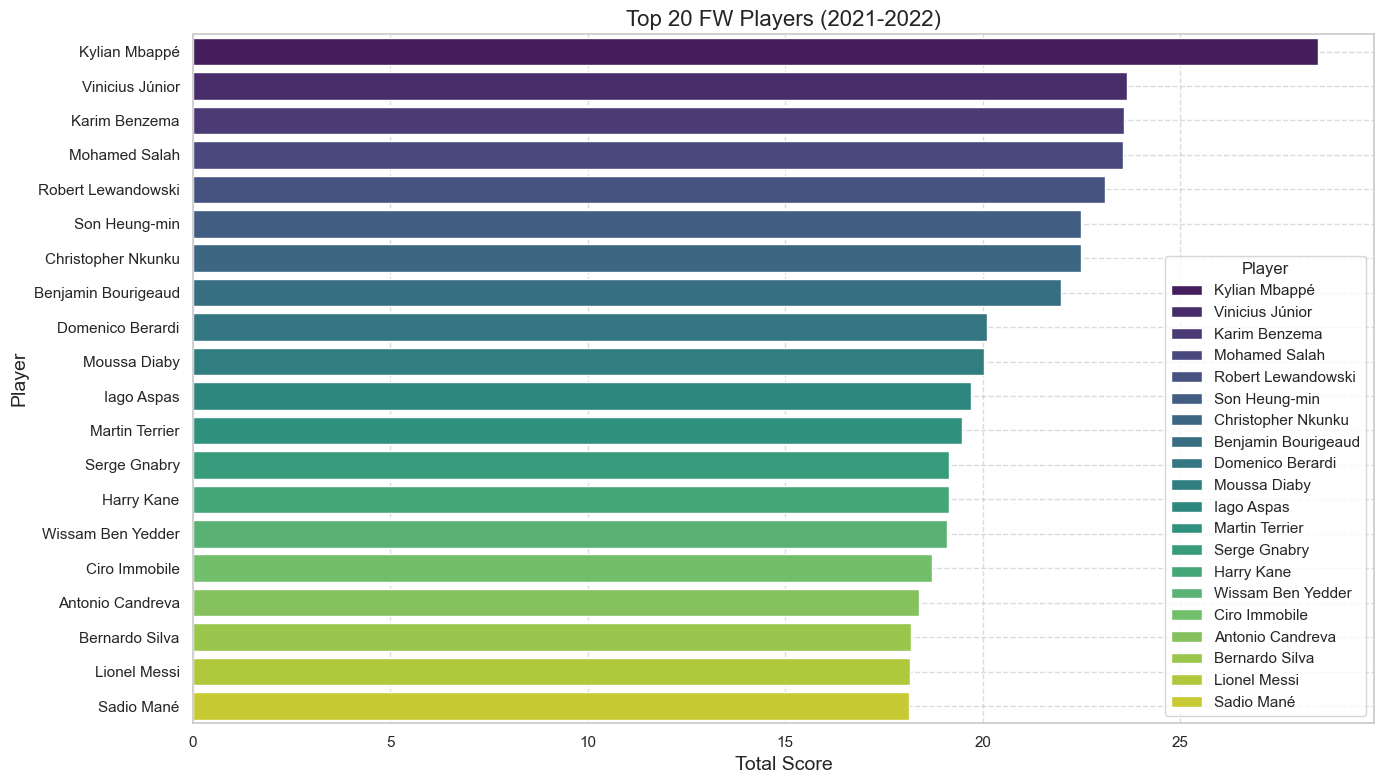

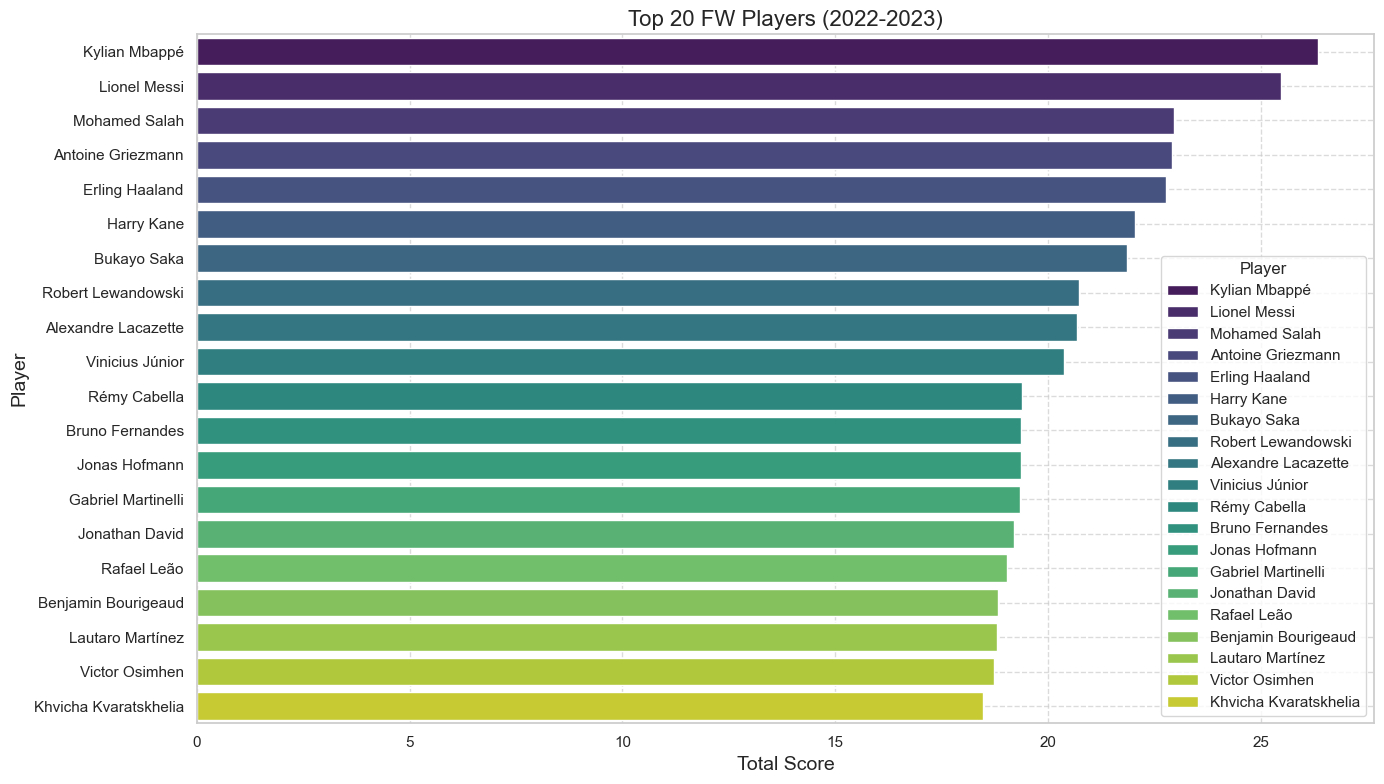

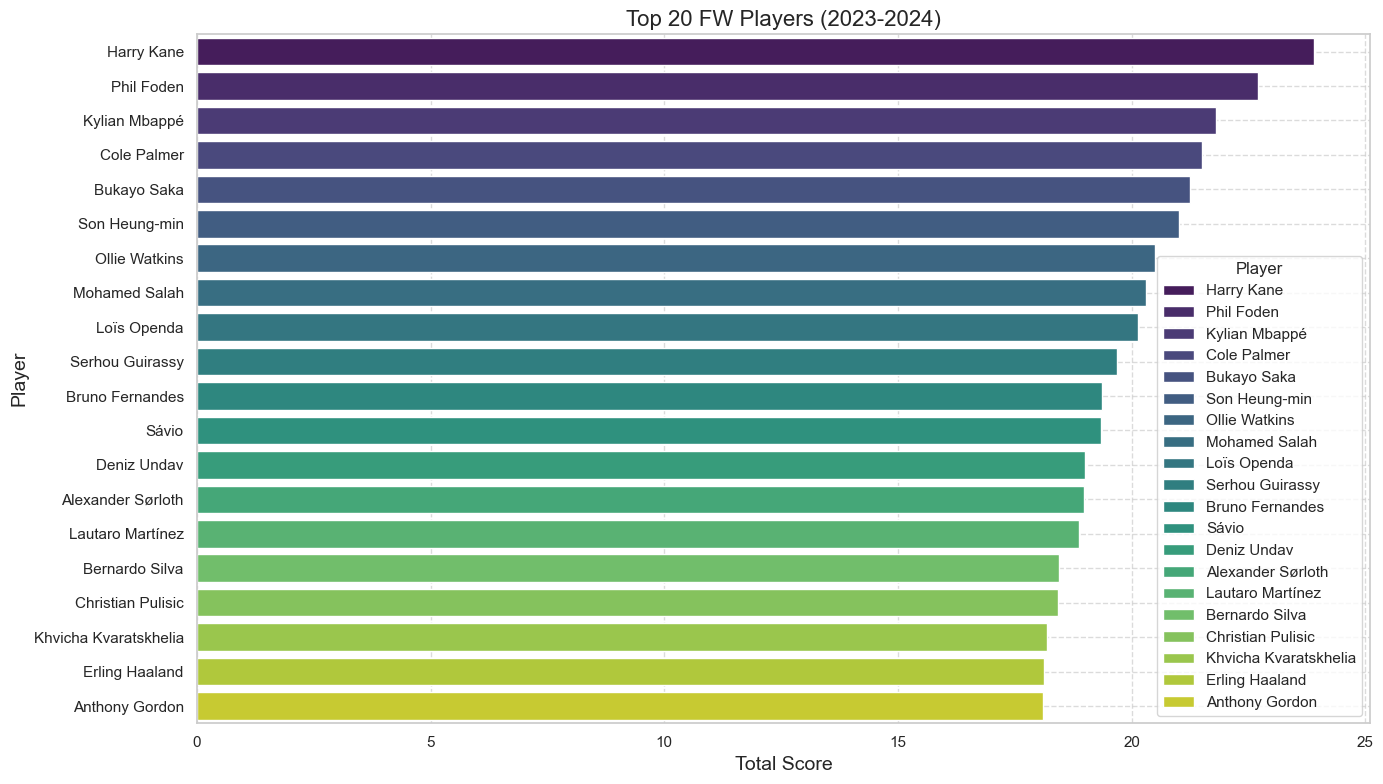

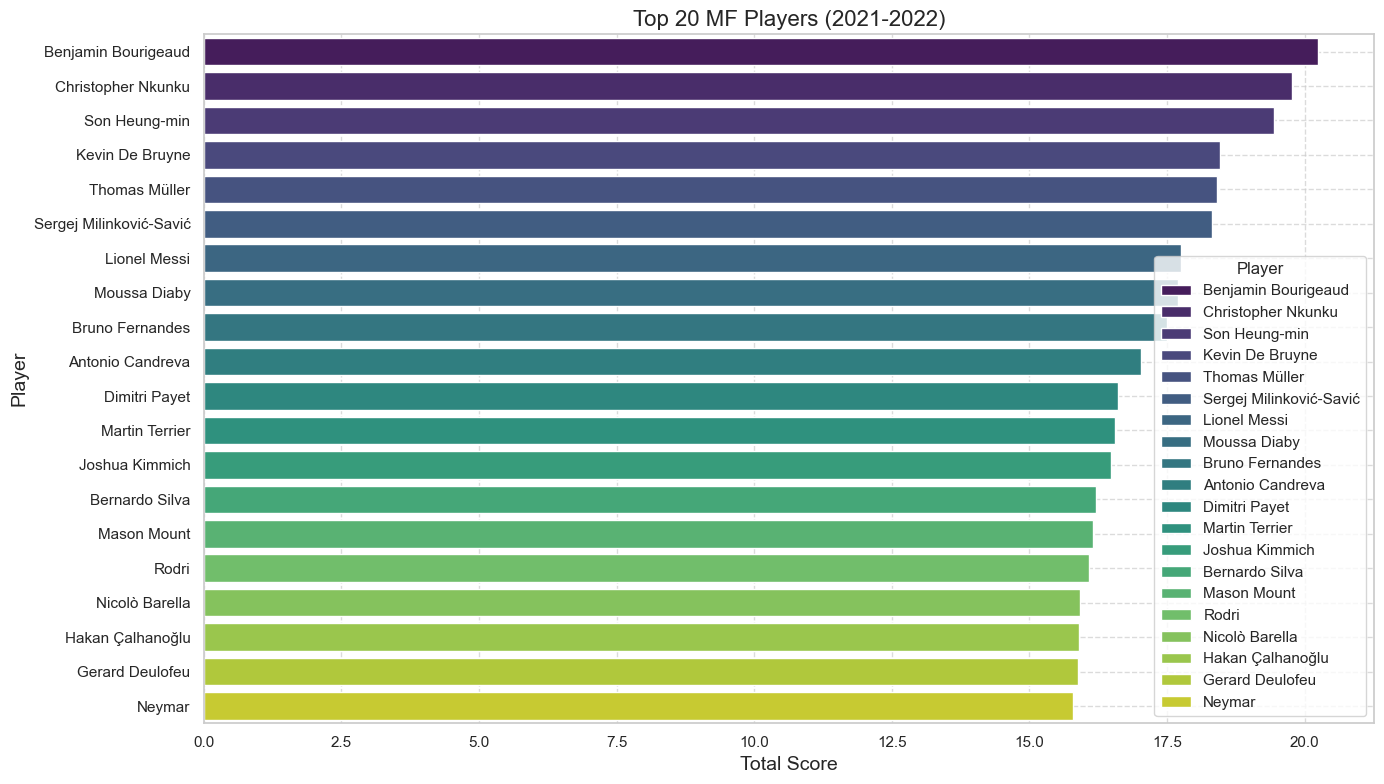

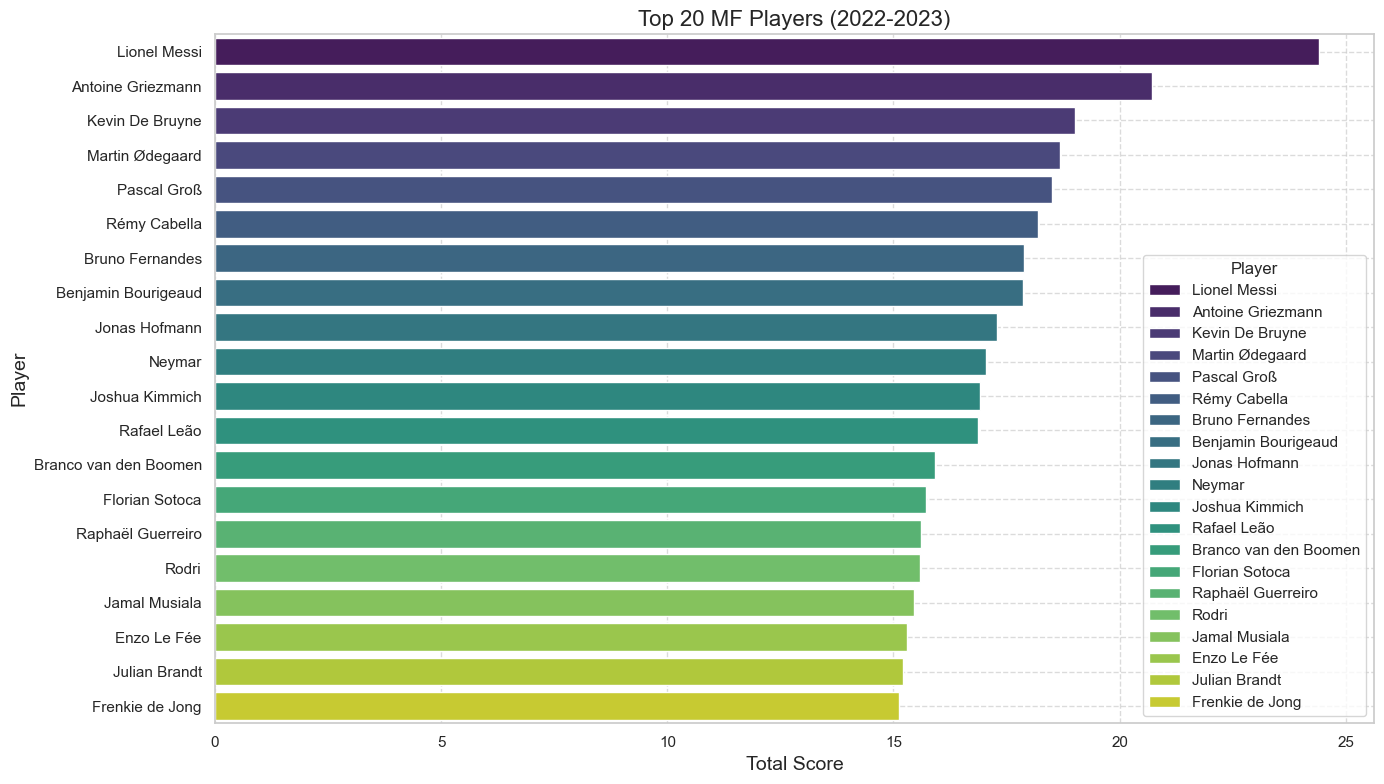

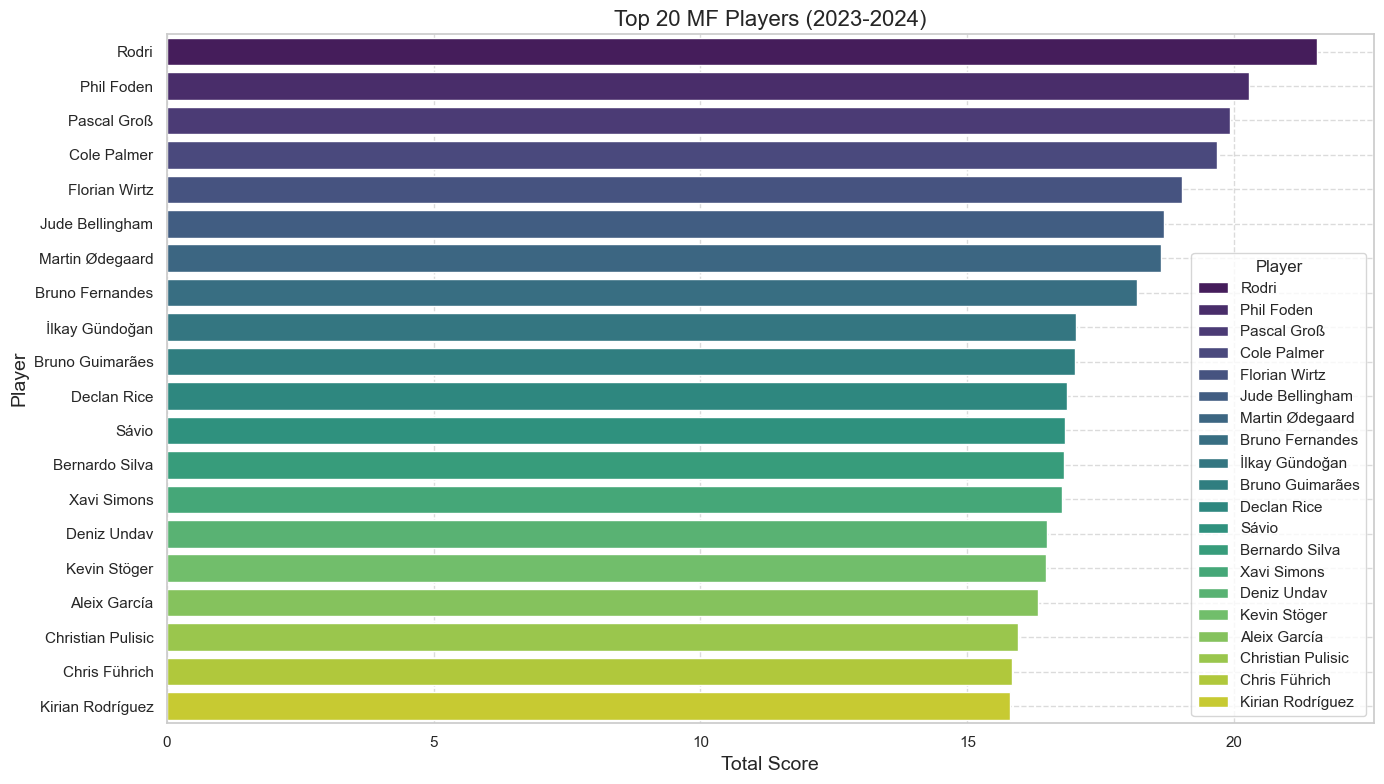

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 각 시즌별 상위 20명의 선수를 시각화하는 함수
def plot_top_20_players_by_total_score(dfs, position, seasons):
    for season in seasons:
        key = f"{season}_{position}"
        if key in dfs:
            df = dfs[key].head(20)
            
            plt.figure(figsize=(14, 8))
            sns.set(style="whitegrid")
            
            sns.barplot(x='Total_score', y='Player', data=df.sort_values('Total_score', ascending=False), hue='Player', dodge=False, palette='viridis')
            
            plt.title(f'Top 20 {position} Players ({season})', fontsize=16)
            plt.xlabel('Total Score', fontsize=14)
            plt.ylabel('Player', fontsize=14)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

# 포지션 'FW'의 각 시즌별 총 점수 상위 20명 선수를 시각화
plot_top_20_players_by_total_score(season_position_dfs, 'FW', seasons)
# 포지션 'MF'의 각 시즌별 총 점수 상위 20명 선수를 시각화
plot_top_20_players_by_total_score(season_position_dfs, 'MF', seasons)


#### **3-3-2. Ranking improvement Top 20 players**


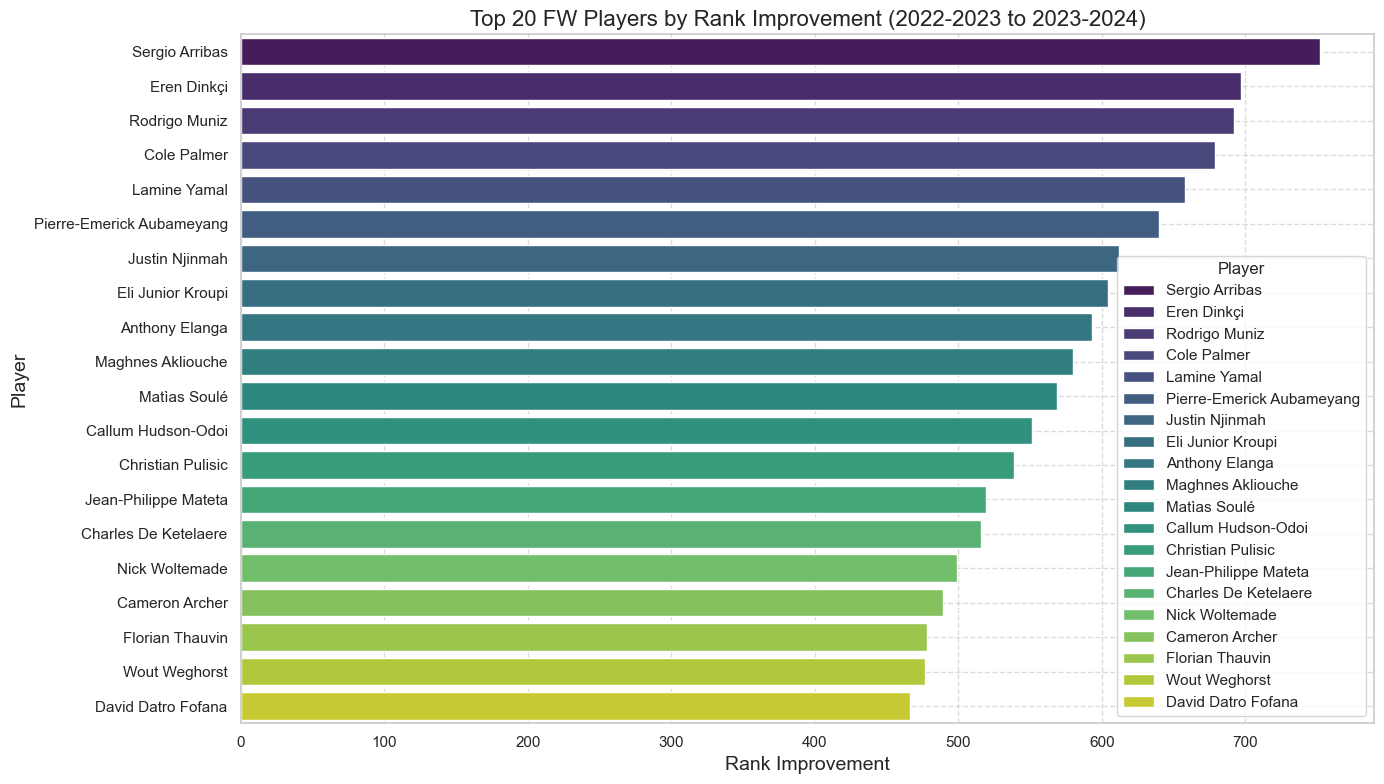

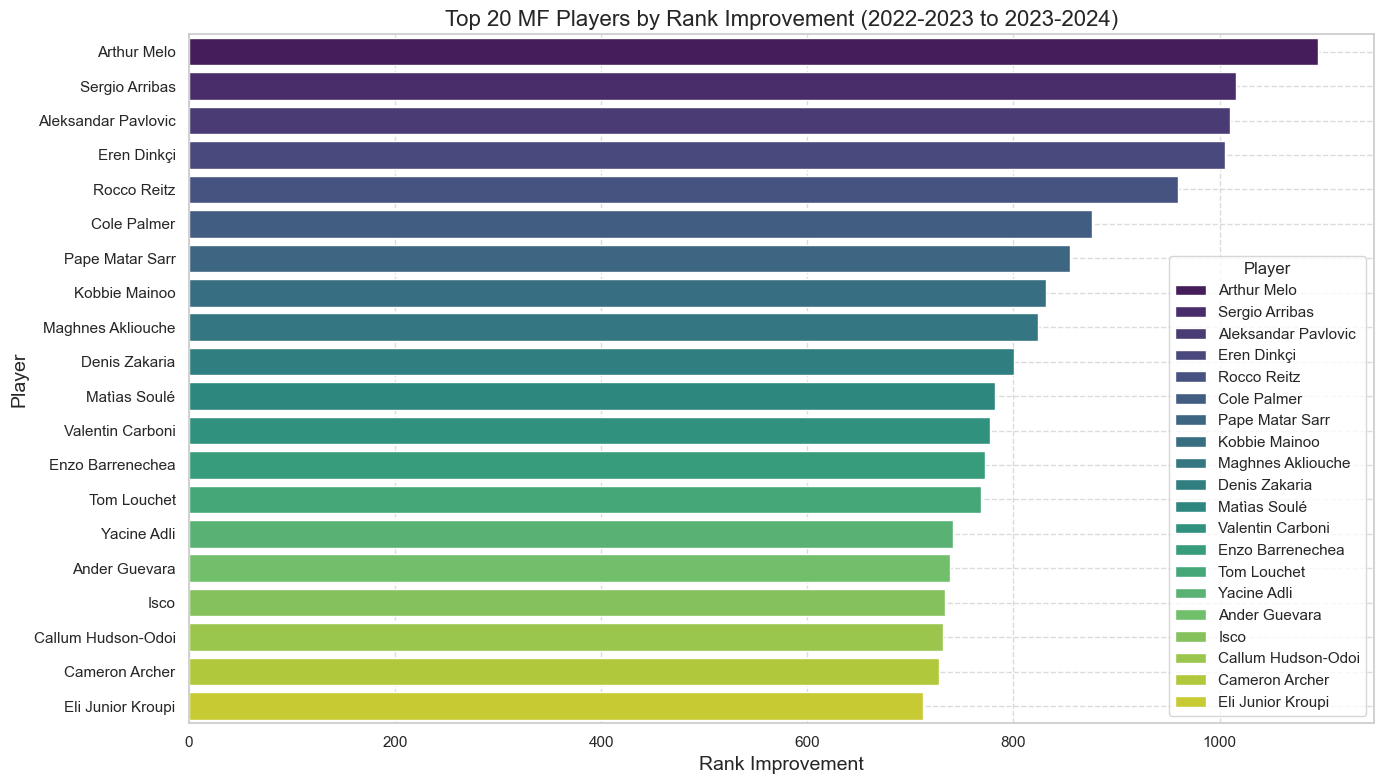

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 두 시즌의 데이터를 비교하여 순위 상승이 큰 20명의 선수를 구하는 함수
def get_top_20_players_by_rank_improvement(dfs, position, season1, season2):
    key1 = f"{season1}_{position}"
    key2 = f"{season2}_{position}"
    
    if key1 in dfs and key2 in dfs:
        df1 = dfs[key1][['Player', 'Total_score_Rank']].rename(columns={'Total_score_Rank': f'Rank_{season1}'})
        df2 = dfs[key2][['Player', 'Total_score_Rank']].rename(columns={'Total_score_Rank': f'Rank_{season2}'})
        
        merged_df = pd.merge(df1, df2, on='Player')
        merged_df['Rank_Improvement'] = merged_df[f'Rank_{season1}'] - merged_df[f'Rank_{season2}']
        top_20_improved_players = merged_df.nlargest(20, 'Rank_Improvement')
        
        return top_20_improved_players

# 상위 20명 선수의 순위 상승 데이터를 시각화하는 함수
def plot_top_20_rank_improvements(dfs, position, season1, season2):
    top_20_improved_players = get_top_20_players_by_rank_improvement(dfs, position, season1, season2)
    
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid")
    
    sns.barplot(x='Rank_Improvement', y='Player', data=top_20_improved_players, palette='viridis', hue='Player', dodge=False)
    
    plt.title(f'Top 20 {position} Players by Rank Improvement ({season1} to {season2})', fontsize=16)
    plt.xlabel('Rank Improvement', fontsize=14)
    plt.ylabel('Player', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 포지션 'FW'의 2022-2023 시즌 대비 2023-2024 시즌 순위 상승이 큰 상위 20명 선수를 시각화
plot_top_20_rank_improvements(season_position_dfs, 'FW', '2022-2023', '2023-2024')
# 포지션 'MF'의 2022-2023 시즌 대비 2023-2024 시즌 순위 상승이 큰 상위 20명 선수를 시각화
plot_top_20_rank_improvements(season_position_dfs, 'MF', '2022-2023', '2023-2024')


#### **3-3-3. Visualizing ranking changes of a specific player across seasons**

Enter the player's position (MF/FW) :  FW
Enter the player's name to visualize rank trend:  Son Heung-min


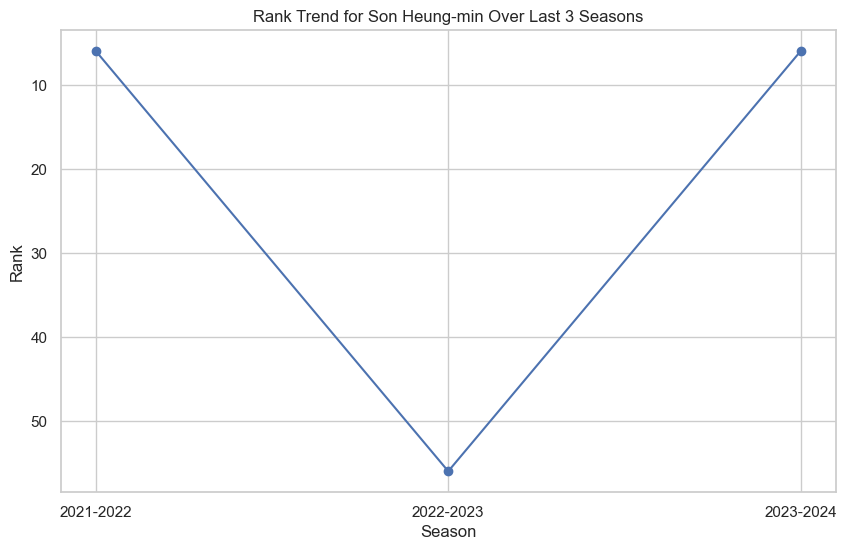

Rank trends for Son Heung-min over the last 3 seasons:
Season 2021-2022: Rank 6
Play time, Expected, Shoot, Performance, Touch, Carry, Receive, Pass
32
6
9
6
31
33
38
59
Season 2022-2023: Rank 56
Play time, Expected, Shoot, Performance, Touch, Carry, Receive, Pass
24
54
112
55
113
122
92
93
Season 2023-2024: Rank 6
Play time, Expected, Shoot, Performance, Touch, Carry, Receive, Pass
19
7
53
13
25
42
9
32


In [222]:
import matplotlib.pyplot as plt
# 특정 선수의 3개년 시즌 등수를 텍스트로 출력하는 함수
def print_player_ranks(player_name, season_position_dfs, seasons, positions):
    print(f"Rank trends for {player_name} over the last 3 seasons:")
    for season in seasons:
        key = f"{season}_{positions}"
        df = season_position_dfs[key]
        if player_name in df['Player'].values:
            player_row = df[df['Player'] == player_name]
            total_score_rank = player_row['Total_score_Rank'].values[0]
            print(f"Season {season}: Rank {total_score_rank}")
            ranks = [ 'Playing time_total_score_Rank', 'Expected Goals and Assists_total_score_Rank', 
                             'Shooting_total_score_Rank', 'Performance_total_score_Rank', 'Touches_total_score_Rank', 
                             'Carries_total_score_Rank', 'Receiving_total_score_Rank', 'Passing_total_score_Rank']
            print("Play time, Expected, Shoot, Performance, Touch, Carry, Receive, Pass")
            for rank in ranks :
                print(f"{player_row[rank].values[0]}")

# 선수의 최근 3년간 순위 변화를 시각화하는 함수
def plot_player_rank_trend(player_name, season_position_dfs, seasons, positions):
    player_data = []
    for season in seasons:
        key = f"{season}_{positions}"
        df = season_position_dfs[key]
        if player_name in df['Player'].values:
            player_row = df[df['Player'] == player_name]
            total_score_rank = player_row['Total_score_Rank'].values[0]
            player_data.append((season, positions, total_score_rank))

    if not player_data:
        print(f"No data found for player: {player_name}")
        return

    # 데이터 정렬
    player_data.sort(key=lambda x: seasons.index(x[0]))

    # 시즌별 순위 변화를 시각화
    seasons = [data[0] for data in player_data]
    ranks = [data[2] for data in player_data]

    plt.figure(figsize=(10, 6))
    plt.plot(seasons, ranks, marker='o', linestyle='-', color='b')
    plt.gca().invert_yaxis()  # 순위가 낮을수록 좋은 것이므로 Y축을 반전시킴
    plt.title(f'Rank Trend for {player_name} Over Last 3 Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.grid(True)
    plt.show()
    print_player_ranks(player_name, season_position_dfs, seasons, positions)
            
# 사용자로부터 선수명을 입력받아 그래프를 그리는 함수
position = input("Enter the player's position (MF/FW) : ")
player_name = input("Enter the player's name to visualize rank trend: ")
plot_player_rank_trend(player_name, season_position_dfs, seasons, position)


#### **3-3-4. Visualizing ranking changes of the Top 100 players over three consecutive seasons**

input MF or FW : FW


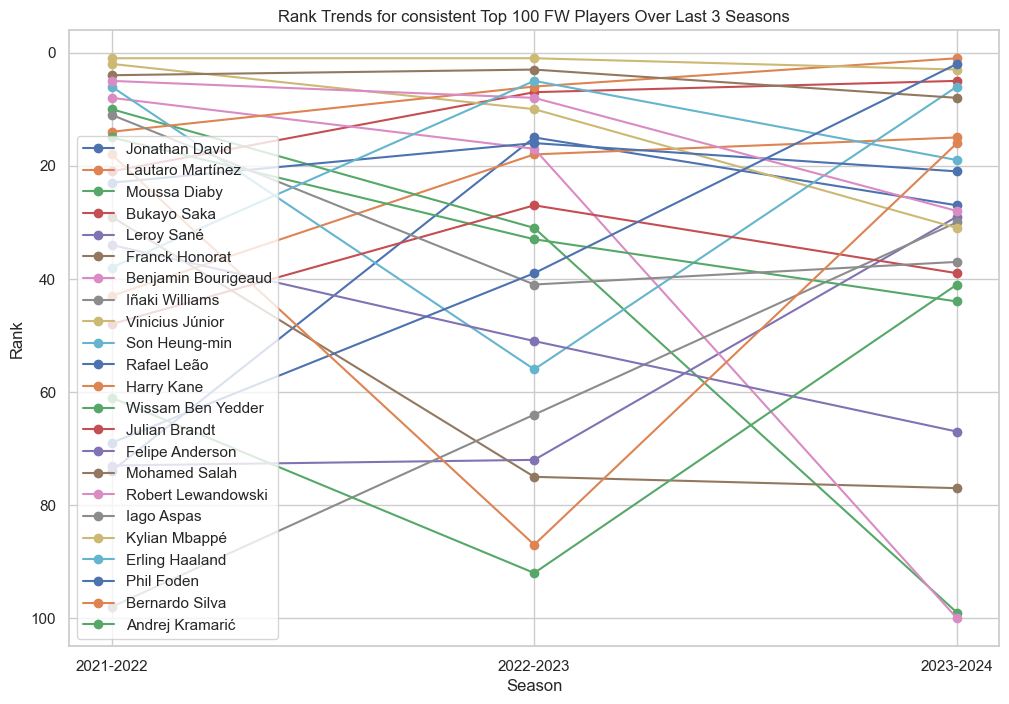

Enter one of the following players to highlight:
Jonathan David, Lautaro Martínez, Moussa Diaby, Bukayo Saka, Leroy Sané, Franck Honorat, Benjamin Bourigeaud, Iñaki Williams, Vinicius Júnior, Son Heung-min, Rafael Leão, Harry Kane, Wissam Ben Yedder, Julian Brandt, Felipe Anderson, Mohamed Salah, Robert Lewandowski, Iago Aspas, Kylian Mbappé, Erling Haaland, Phil Foden, Bernardo Silva, Andrej Kramarić
 Erling Haaland


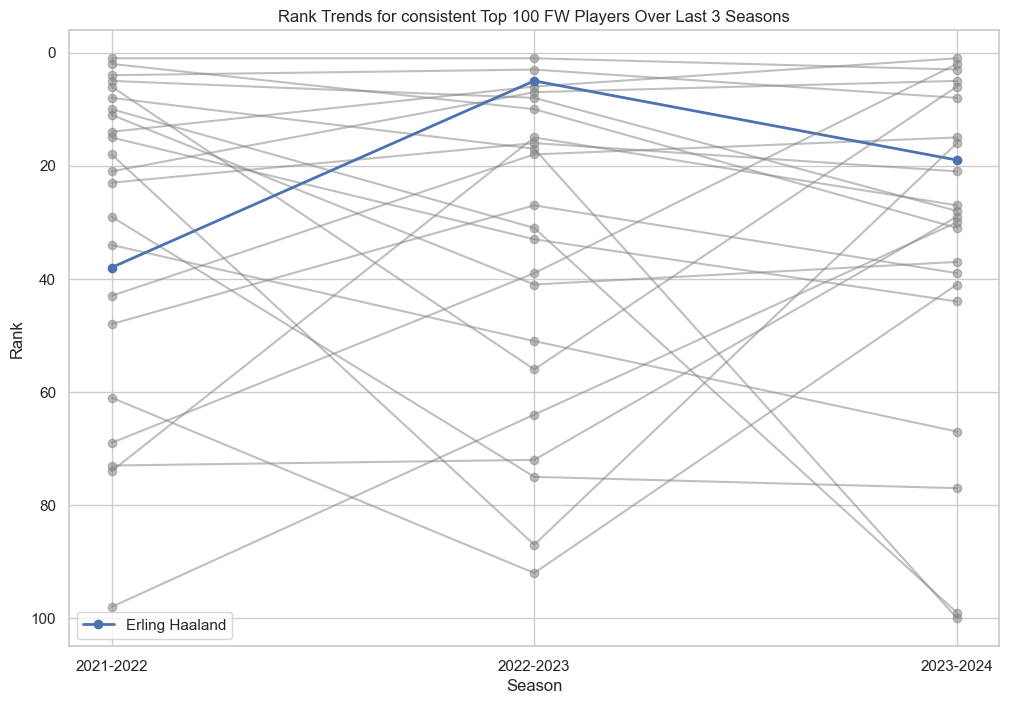

Rank trends for Erling Haaland over the last 3 seasons:
Season 2021-2022: Rank 38
Season 2022-2023: Rank 5
Season 2023-2024: Rank 19


In [223]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# 각 시즌의 상위 100명의 FW 선수 추출
def get_top_100_players(season_position_dfs, season, position):
    key = f"{season}_{position}"
    df = season_position_dfs[key]
    top_100_players = df.nlargest(100, 'Total_score')['Player'].tolist()
    return set(top_100_players)

# 모든 시즌에서 상위 100명에 든 FW 선수들의 교집합을 구하는 함수
def get_consistent_top_100_players(season_position_dfs, seasons, position):
    top_100_sets = [get_top_100_players(season_position_dfs, season, position) for season in seasons]
    consistent_top_100_players = set.intersection(*top_100_sets)
    return consistent_top_100_players
    
# 선수의 최근 3년간 순위 변화를 시각화하는 함수
def plot_player_rank_trend(player_name, season_position_dfs, seasons, positions):
    player_data = []

    for season in seasons:
        key = f"{season}_{positions}"
        df = season_position_dfs[key]
        if player_name in df['Player'].values:
            player_row = df[df['Player'] == player_name]
            total_score_rank = player_row['Total_score_Rank'].values[0]
            player_data.append((season, position, total_score_rank))

    if not player_data:
        print(f"No data found for player: {player_name}")
        return

    # 데이터 정렬
    player_data.sort(key=lambda x: seasons.index(x[0]))

    # 시즌별 순위 변화를 시각화
    seasons_with_data = [data[0] for data in player_data]
    ranks = [data[2] for data in player_data]

    plt.figure(figsize=(10, 6))
    plt.plot(seasons_with_data, ranks, marker='o', linestyle='-', color='b', label=player_name)
    plt.gca().invert_yaxis()  # 순위가 낮을수록 좋은 것이므로 Y축을 반전시킴
    plt.title(f'Rank Trend for {player_name} Over Last 3 Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.grid(True)
    plt.legend()
    plt.show()


# 모든 선수의 순위 변화를 시각화하는 함수
def plot_all_top_players_rank_trend_2(players, season_position_dfs, seasons, positions, highlight_player=None, flag = 0):
    plt.figure(figsize=(12, 8))
    for player_name in players:
        player_data = []
        for season in seasons:
            key = f"{season}_{positions}"
            df = season_position_dfs[key]
            if player_name in df['Player'].values:
                player_row = df[df['Player'] == player_name]
                total_score_rank = player_row['Total_score_Rank'].values[0]
                player_data.append((season, position, total_score_rank))
        
        if not player_data:
            continue

        # 데이터 정렬
        player_data.sort(key=lambda x: seasons.index(x[0]))

        # 시즌별 순위 변화를 시각화
        seasons_with_data = [data[0] for data in player_data]
        ranks = [data[2] for data in player_data]
        
        if flag == 1 :
            plt.plot(seasons_with_data, ranks, marker='o', linestyle='-', label=player_name)
        elif player_name == highlight_player:
            plt.plot(seasons_with_data, ranks, marker='o', linestyle='-', label=player_name, linewidth=2, color='b')
        else:
            plt.plot(seasons_with_data, ranks, marker='o', linestyle='-', color='gray', alpha=0.5)
    
    plt.gca().invert_yaxis()  # 순위가 낮을수록 좋은 것이므로 Y축을 반전시킴
    plt.title(f'Rank Trends for consistent Top 100 {positions} Players Over Last 3 Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.grid(True)
    if flag == 1 or highlight_player:
        plt.legend()
    plt.show()

# 특정 선수의 3개년 시즌 등수를 텍스트로 출력하는 함수
def print_player_ranks(player_name, season_position_dfs, seasons, positions):
    print(f"Rank trends for {player_name} over the last 3 seasons:")
    for season in seasons:
        key = f"{season}_{positions}"
        df = season_position_dfs[key]
        if player_name in df['Player'].values:
            player_row = df[df['Player'] == player_name]
            total_score_rank = player_row['Total_score_Rank'].values[0]
            print(f"Season {season}: Rank {total_score_rank}")


position = input("input MF or FW :")
# FW 포지션에서 3개 년도에 모두 top 100에 든 선수들의 집합 구하기
consistent_top_100_FW_players = get_consistent_top_100_players(season_position_dfs, seasons, position)

# 모든 선수의 순위 변화를 시각화
plot_all_top_players_rank_trend_2(consistent_top_100_FW_players, season_position_dfs, seasons, position, None, 1)

# 사용자로부터 선수명을 입력받아 해당 선수를 강조 표시하는 함수
player_name = input(f"Enter one of the following players to highlight:\n{', '.join(consistent_top_100_FW_players)}\n")
if player_name in consistent_top_100_FW_players:
    plot_all_top_players_rank_trend_2(consistent_top_100_FW_players, season_position_dfs, seasons, position, highlight_player=player_name)
    print_player_ranks(player_name, season_position_dfs, seasons, position)
else:
    print(f"Player not found in the consistent top 100 {position}FW players set.")


### **3-4. 💡Insights**
* Through this tool, we were able to identify underrated players, such as Pascal Groß from Brighton.
* When we generated rankings, players commonly regarded as excellent by the public indeed scored high.
* This validates our data-driven approach. For instance, Cole Palmer, who has exhibited outstanding performance this season, was accurately reflected in the rankings.
  
  
### **3-5. Future Directions for the Project**
* Incorporating Market Value Data: Integrating market value data to perform regression analysis for predicting future market values.
* Predicting Future Success: Using data on promising young players to forecast which ones might achieve success in the future




---

## **4. Predicting Team Match Results Based on Players' Power Rank**
  

This shows European big 5 football league match results and its analysis. First of all, we have to use preprocessed dataset from previous procedure. Preprocessed files have seperated data by year, so we have to combine them by league. Also, there are players' performance index files based on ranking for Forward and Midfielder. These files are grouped by team, the value for team is average performance index of players.

  Secondly, we will find top 10 teams for each league, then there will be heatmap for top 10 teams that is representing match result for 3 years between them. To get more meaningful information, we will adopt linear regression to understand linear correlation between difference of performance index and match result. At last, there will be a final heatmap for top 10 teams. Let's get started.

---
### **4-1. Using Heatmap**
We should use heatmap for the win-lose ratings with visualization - heatmap.


In [7]:
# Import seaborn and matplolib module to use heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create heatmap
def create_heatmap(team_results):
    df = pd.DataFrame(team_results, columns=['Team', 'Opponent', 'Result'])
    '''
    'Team' for y axis, 'Opponent' for x axis, 'Result' for value at the point
    '''
    df_pivot = df.pivot_table(index='Team', columns='Opponent', values='Result')
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
    plt.title('Team Results Heatmap')
    plt.show()


---
### **4-2. Finding Top 10 Teams**
To find top 10 teams, we have to select what attribute to sort by. Since the terminoloy 'result' is 'Goal for - Goal against' in this ipynb file, it is reasonable to select 'result' for sorting attribute. That is, positive 'result' means 'won by n goals', negative means the opposite, and 0 means 'Draw'. For more explanation, due to performance indices for each team that we will use further are based on player's individual performance, also, there is no defender's information in this ipynb file, it is nice to use 'result'.
  
After finding top 10 teams, first we will create heatmap between top 10 teams. Although this heatmap can show correlation or the most powerful team among 10 teams, we still need more certain visualization or relation between them. So we will adopt linear regression. The purpose of this regression is to understand correlation between difference of performance index and result. We start with hypothesis that there is a proportional relationship between difference of performance index and result. For other words, the larger difference of performance index, the bigger result.
  
  Since the methodology for each league is same, so implementation detailed explanation will only be in Premier League section by comment.

---
#### **4-2-1. Premier League**

###### 1) **First step: Find top 10 teams in PL**

In [10]:
# find top 10 teams
pl_teams = [] # which team is member of PL
# the member of this list can be different from another season because there is promotion & relegation

pl_total = {} # Team(key), sum of result for 3 years(value)

# iterate row by row through dataframe
for index, row in pl_df.iterrows():
    team = row['Team']
    result = row['Result']

    if team not in pl_total: # first referencing of team
        pl_total[team] = result # add to dictionary with value
        pl_teams.append(team) # be the member of PL
    else: # after first reference
        pl_total[team] += result # just increment result

# convert dictionary to dataframe
pl_total_df = pd.DataFrame(list(pl_total.items()), columns=['Team', 'Total'])
# sort by descending order
pl_total_df = pl_total_df.sort_values(by='Total', ascending=False)
# extract top 10 elements
pl_top_10 = pl_total_df.head(10)
# record top 10 teams' name in list
pl_top_10_teams = pl_top_10['Team'].tolist()

print(pl_top_10)

                 Team  Total
1             Arsenal     62
12    Manchester City     62
10          Liverpool     45
14   Newcastle United     23
2         Aston Villa     15
6             Chelsea     14
17  Tottenham Hotspur     13
13  Manchester United     -1
7      Crystal Palace     -1
9              Fulham     -6


##### **2) Step two: Extract matches between top 10 teams and generate initial heatmap**

                  Team           Opponent  Result
0              Arsenal  Manchester United       1
1              Arsenal  Tottenham Hotspur       1
2              Arsenal            Chelsea       5
3              Arsenal        Aston Villa      -2
4              Arsenal    Manchester City       0
..                 ...                ...     ...
175  Tottenham Hotspur     Crystal Palace       1
176  Tottenham Hotspur             Fulham       2
177  Tottenham Hotspur          Liverpool       1
178  Tottenham Hotspur            Arsenal       0
179  Tottenham Hotspur  Manchester United       2

[180 rows x 3 columns]


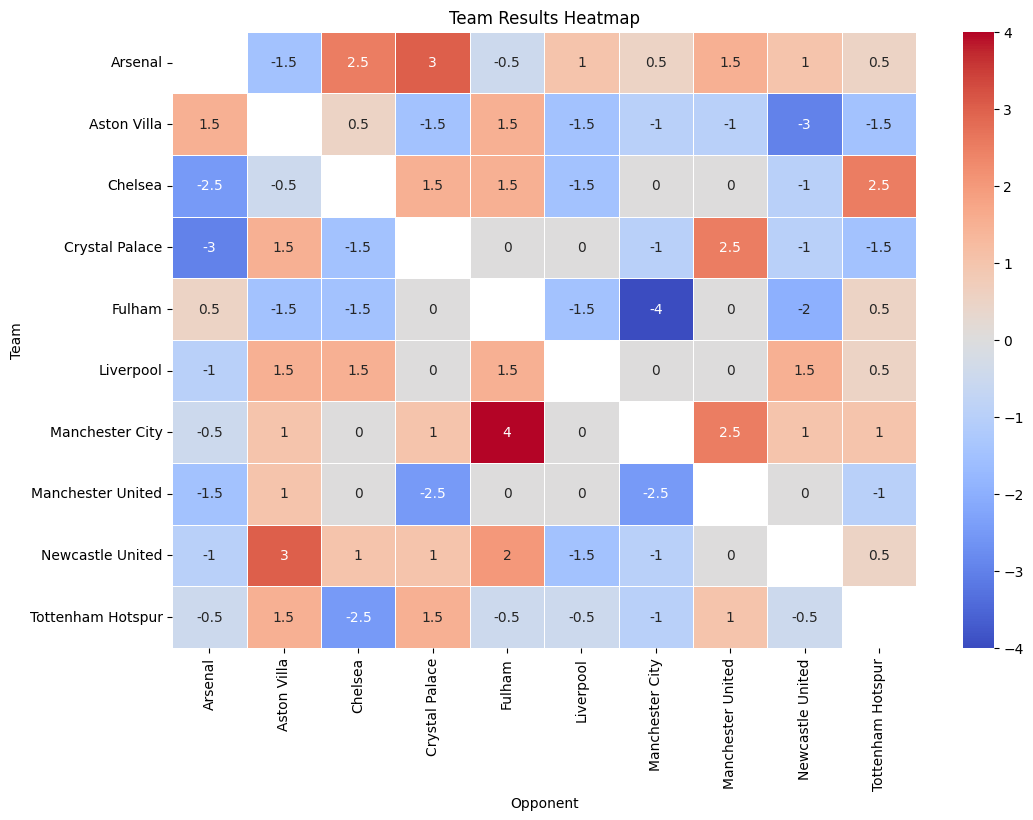

In [11]:
# generate list to record matches
pl_top_10_match = []
# iterate row by row throught dataframe
for index, row in pl_df.iterrows():
    # extract data from each row
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    # check if the match is top 10 teams' game
    if team in pl_top_10_teams and opponent in pl_top_10_teams:
        # append to list as dictionary
        pl_top_10_match.append({'Team': team, 'Opponent': opponent, 'Result': result})

# convert list of dictionaries to dataframe
pl_top_10_match_df = pd.DataFrame(pl_top_10_match)
print(pl_top_10_match_df)

# generate heatmap
create_heatmap(pl_top_10_match_df)

For more reliable statistics, we want to adopt linear regression based on performance index for each team. We're offering 'FW.csv', and 'MF.csv' that have average performance index of the team. Just sum up them to get the team's FW+MF average performance index.

In [15]:
fw_df = pd.read_csv('n_fw_df.csv')

# this process is to treat abbreviation
for i in range(len(pl_teams)):
    if pl_teams[i] == 'Brighton & Hove Albion':
        pl_teams[i] = 'Brighton'
    elif pl_teams[i] == 'Manchester United':
        pl_teams[i] = 'Manchester Utd'
    elif pl_teams[i] == 'Newcastle United':
        pl_teams[i] = 'Newcastle Utd'
    elif pl_teams[i] == 'Wolverhampton Wanderers':
        pl_teams[i] = 'Wolves'
    elif pl_teams[i] == 'Tottenham Hotspur':
        pl_teams[i] = 'Tottenham'
    elif pl_teams[i] == 'West Ham United':
        pl_teams[i] = 'West Ham'
    elif pl_teams[i] == 'Sheffield United':
        pl_teams[i] = 'Sheffield'

# generate empty dictionary to save (team: score)
pl_scores = {}
# iterate row by row throught dataframe
for index, row in fw_df.iterrows():
    team = row['Team']
    score = row['Total_score']
    # this process is to treat abbreviation
    if team in pl_teams:
        if team not in pl_scores: # first referencing team
            if team == 'Brighton':
                team = 'Brighton & Hove Albion'
            elif team == 'Manchester Utd':
                team = 'Manchester United'
            elif team == 'Newcastle Utd':
                team = 'Newcastle United'
            elif team == 'Wolves':
                team = 'Wolverhampton Wanderers'
            elif team == 'Tottenham':
                team = 'Tottenham Hotspur'
            elif team == 'West Ham':
                team = 'West Ham United'
            elif team == 'Sheffield':
                team = 'Sheffield United'
            pl_scores[team] = score # add key: value to dictionary
        elif team in pl_scores: # after first referencing
            pl_scores[team] += score # just increment score
        else:
            '''
            if there is no proper team name
             or team is not in top 10
            '''
            pl_scores[team] = 0 # score set to 0

print(pl_scores)

{'Manchester City': 19.3176338897032, 'Liverpool': 12.144840769670282, 'Arsenal': 13.254665494772187, 'West Ham United': 7.076936615856911, 'Aston Villa': 12.152028325120988, 'Newcastle United': 5.685894554769288, 'Brentford': 9.75171155186905, 'Brighton & Hove Albion': 3.965408965828154, 'Manchester United': 6.210643915844579, 'Fulham': 9.049909108892793, 'Tottenham Hotspur': 6.87127925297731, 'Everton': 10.522838913585634, 'Luton Town': 7.99227917629852, 'Chelsea': 8.988927165128487, 'Crystal Palace': 8.48512268548954, 'Burnley': 9.161349405108787, 'Wolverhampton Wanderers': 4.898606705990306}


In [16]:
# add Difference attribute to original dataframe
# generate empty dictionary list
pl_diff = []
# iterate row by row through dataframe
for index, row in pl_df.iterrows():
    # extract data from row
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    '''
    there can occur error because there may be no performance index
    for a team. For that exception, set score to 0
    '''
    try: # t_score is team score
        t_score = pl_scores[team]
    except:
        t_score = 0
    try: # o_score is opponent score
        o_score = pl_scores[opponent]
    except:
        o_score = 0
    # substract opponent score value from team score value
    diff = t_score - o_score
    # append to dictionary list
    pl_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})

# convert list of dictionary to dataframe
pl_diff_df = pd.DataFrame(pl_diff)
print(pl_diff_df)

                        Team                 Opponent  Result  Difference
0            AFC Bournemouth                  Chelsea      -1   -8.988927
1            AFC Bournemouth                Brentford      -1   -9.751712
2            AFC Bournemouth                  Arsenal      -3  -13.254665
3            AFC Bournemouth   Brighton & Hove Albion       3   -3.965409
4            AFC Bournemouth  Wolverhampton Wanderers       1   -4.898607
..                       ...                      ...     ...         ...
755  Wolverhampton Wanderers                Liverpool      -2   -7.246234
756  Wolverhampton Wanderers           Crystal Palace      -1   -3.586516
757  Wolverhampton Wanderers                  Everton       1   -5.624232
758  Wolverhampton Wanderers   Brighton & Hove Albion      -3    0.933198
759  Wolverhampton Wanderers        Manchester United      -1   -1.312037

[760 rows x 4 columns]


##### **3) Adopting Linear Regression**

For reliable or accurate prediction, we decided to adopt linear regression. From hypothesis at the beginning that there may be exist proportional relation between average performance index and result, additionally, by applying linear regression model, we can analyze or interpret the result only based on team's average performance index.

Slope: 0.11714824707653429
Intercept: 1.7523965466791755e-17


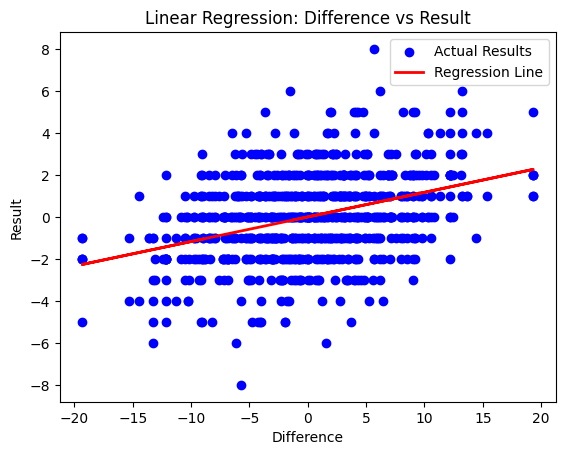

Mean Squared Error: 3.719774642037051
R^2: 0.1433246278944973


In [18]:
# import modules to use linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# set difference of average performance index at x axis
X = pl_diff_df['Difference'].values.reshape(-1, 1)
# set result of match at y axis
y = pl_diff_df['Result'].values

'''
 set linear regression model and fit x and y
 and display plot
 '''
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

plt.scatter(X, y, color='blue', label='Actual Results')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Difference')
plt.ylabel('Result')
plt.title('Linear Regression: Difference vs Result')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

There exists proportional relation between difference of performance index and result.(reliability=14.9%) Then we can generate heatmap again and analyze it.

                  Team           Opponent    Result  Difference
0              Arsenal  Manchester United  0.747030    7.044022
1              Arsenal  Tottenham Hotspur  0.675421    6.383386
2              Arsenal            Chelsea  0.445879    4.265738
3              Arsenal        Aston Villa  0.103016    1.102637
4              Arsenal    Manchester City -0.673697   -6.062968
..                 ...                ...       ...         ...
175  Tottenham Hotspur     Crystal Palace -0.191436   -1.613843
176  Tottenham Hotspur             Fulham -0.252655   -2.178630
177  Tottenham Hotspur          Liverpool -0.588129   -5.273562
178  Tottenham Hotspur            Arsenal -0.708428   -6.383386
179  Tottenham Hotspur  Manchester United  0.055106    0.660635

[180 rows x 4 columns]


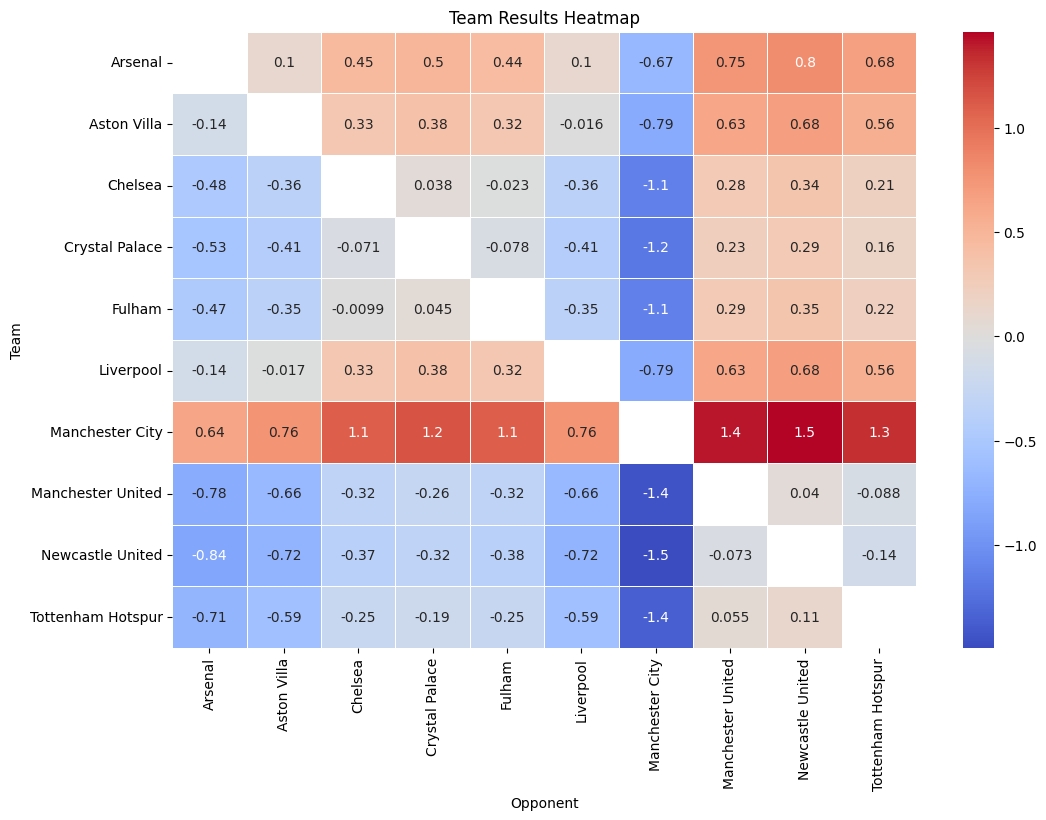

In [19]:
# generate empty dictionary list
pl_top_10_diff = []
# iterate row by row through dataframe
for index, row in pl_diff_df.iterrows():
    # extract data from row
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    diff = row['Difference']
    # if the team is in top 10
    if team in pl_top_10_teams and opponent in pl_top_10_teams:
        pl_top_10_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
# convert list of dictionary to dataframe
pl_top_10_diff_df = pd.DataFrame(pl_top_10_diff)

# generate empty dictionary list
pl_regression = []
# iterate row by row through dataframe
for index, row in pl_top_10_diff_df.iterrows():
    # extract data from row
    team = row['Team']
    opponent = row['Opponent']
    # apply linear regression model
    result = row['Difference'] * 0.10839458716281687 - 0.016503697009748065
    diff = row['Difference']
    pl_regression.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
pl_regression_df = pd.DataFrame(pl_regression)
print(pl_regression_df)

# generate heatmap
create_heatmap(pl_regression_df)

From final heatmap, how can we interprete the heatmap? Value inside the block represents the goal difference gained against opponent based on regression model. For example, Man City may win Arsenal by gaining 0.64 goal difference per match based on player's performance. Then we can get some insights from this heatmap.


  

> Man City may dominant the league next season again.

> Who can stop Man City? The most likely team is Arsenal.

> Player's performance based model shows that actual goal difference is larger than estimated goal difference. What does it mean? What makes larger goal difference than estimated one?



  From now on, implementation detailed explanation is done. For other leagues, we will suggest insights that can be come up with linear regression based heatmap.




---
#### **4-2-2. La Liga**  
**(The codes are similar from the prior one. Let's focus on the results below.)**

             Team  Total
15    Real Madrid     61
8          Girona     39
4       Barcelona     35
2   Athletic Club     24
16  Real Sociedad     12
14     Real Betis      3
19     Villarreal      0
1         Almeria     -4
18       Valencia     -5
17        Sevilla     -6
           Team       Opponent  Result
0       Almeria     Real Betis      -1
1       Almeria  Real Sociedad       0
2       Almeria       Valencia      -1
3       Almeria    Real Madrid      -1
4       Almeria      Barcelona      -1
..          ...            ...     ...
148  Villarreal        Sevilla       0
149  Villarreal  Athletic Club      -1
150  Villarreal         Girona      -1
151  Villarreal      Barcelona      -1
152  Villarreal     Real Betis      -1

[153 rows x 3 columns]


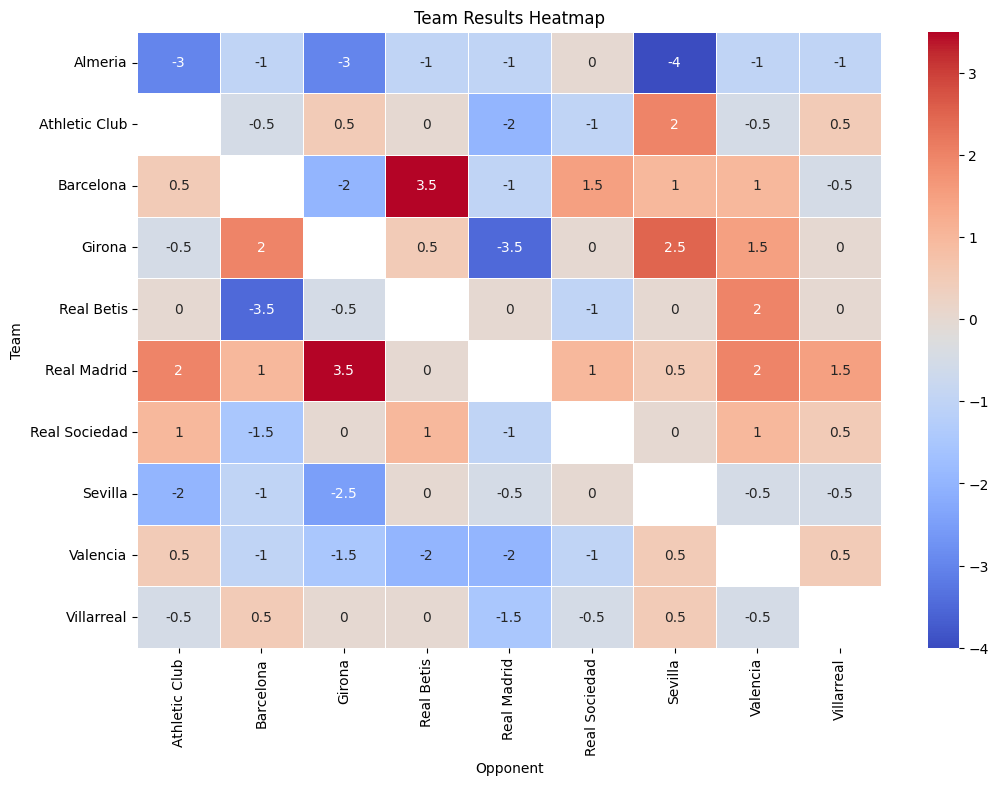

In [21]:
laliga_teams = []
laliga_total = {}
for index, row in laliga_df.iterrows():
    team = row['Team']
    if team == 'Almería':
        team = 'Almeria'
    result = row['Result']

    if team not in laliga_total:
        laliga_total[team] = result
        laliga_teams.append(team)
    else:
        laliga_total[team] += result

laliga_total_df = pd.DataFrame(list(laliga_total.items()), columns=['Team', 'Total'])
laliga_total_df = laliga_total_df.sort_values(by='Total', ascending=False)
laliga_top_10 = laliga_total_df.head(10)
laliga_top_10_teams = laliga_top_10['Team'].tolist()

print(laliga_top_10)
laliga_top_10_match = []
for index, row in laliga_df.iterrows():
    team = row['Team']
    if team == 'Almería':
        team = 'Almeria'
    opponent = row['Opponent']
    result = row['Result']
    #print(team, opponent, result)
    if team in laliga_top_10_teams and opponent in laliga_top_10_teams:
        laliga_top_10_match.append({'Team': team, 'Opponent': opponent, 'Result': result})

laliga_top_10_match_df = pd.DataFrame(laliga_top_10_match)
print(laliga_top_10_match_df)
laliga_top_10_match_df.to_csv('llg.csv', index=False)

create_heatmap(laliga_top_10_match_df)

{'Barcelona': 12.418284318160177, 'Celta Vigo': 11.424914895786666, 'Villarreal': 12.639958177581736, 'Real Madrid': 14.22193901325738, 'Athletic Club': 11.066058178148198, 'Osasuna': 9.87501910509949, 'Real Sociedad': 11.082669411747403, 'Rayo Vallecano': 9.822180534511363, 'Sevilla': 8.942479517121736, 'Girona': 11.16142624118844, 'Getafe': 9.120774805923244, 'Las Palmas': 10.407085348278553, 'Valencia': 8.713313208565886, 'Mallorca': 8.674938396914136, 'Granada': 6.586284117838865}
           Team     Opponent  Result  Difference
0        Alaves   Las Palmas       0  -10.407085
1        Alaves       Alavés      -1    0.000000
2        Alaves  Real Madrid      -5  -14.221939
3        Alaves       Alavés       0    0.000000
4        Alaves     Valencia       1   -8.713313
..          ...          ...     ...         ...
755  Villarreal      Almería       1   12.639958
756  Villarreal        Cádiz      -2   12.639958
757  Villarreal    Barcelona      -1    0.221674
758  Villarreal     

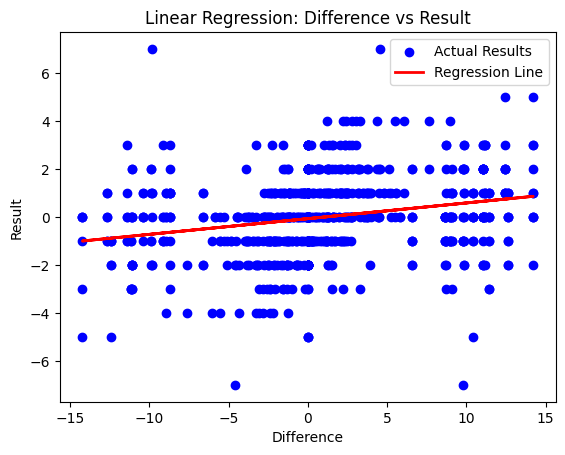

Mean Squared Error: 2.741932814538932
R^2: 0.05696283105334565


In [22]:
laliga_scores = {}

for index, row in fw_df.iterrows():
    team = row['Team']
    score = row['Total_score']
    if team in laliga_teams:
        if team not in laliga_scores:
            laliga_scores[team] = score
        elif team in laliga_scores:
            laliga_scores[team] += score
        else:
            laliga_scores[team] = 0

#pl_scores_df = pd.DataFrame(pl_scores)
print(laliga_scores)

laliga_diff = []
for index, row in laliga_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    try:
        t_score = laliga_scores[team]
    except:
        t_score = 0
    try:
        o_score = laliga_scores[opponent]
    except:
        o_score = 0
    diff = t_score - o_score
    laliga_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})

laliga_diff_df = pd.DataFrame(laliga_diff)
print(laliga_diff_df)

X = laliga_diff_df['Difference'].values.reshape(-1, 1)
y = laliga_diff_df['Result'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

plt.scatter(X, y, color='blue', label='Actual Results')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Difference')
plt.ylabel('Result')
plt.title('Linear Regression: Difference vs Result')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

           Team       Opponent    Result  Difference
0       Almeria     Real Betis  0.019191    0.000000
1       Almeria  Real Sociedad -0.796805  -11.082669
2       Almeria       Valencia -0.622354   -8.713313
3       Almeria    Real Madrid -1.027944  -14.221939
4       Almeria      Barcelona -0.895144  -12.418284
..          ...            ...       ...         ...
148  Villarreal        Sevilla  0.291429    3.697479
149  Villarreal  Athletic Club  0.135074    1.573900
150  Villarreal         Girona  0.128052    1.478532
151  Villarreal      Barcelona  0.035512    0.221674
152  Villarreal     Real Betis  0.949847   12.639958

[153 rows x 4 columns]


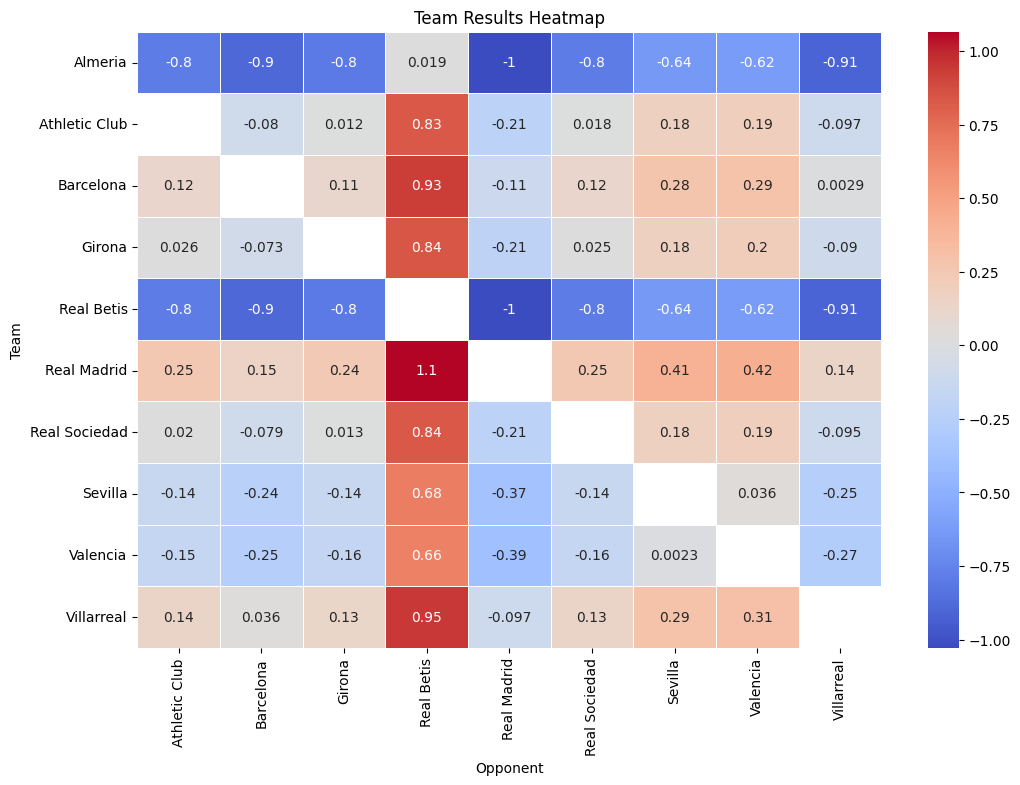

In [23]:
laliga_top_10_diff = []
for index, row in laliga_diff_df.iterrows():
    team = row['Team']
    if team == 'Alméria':
        team = 'Almeria'
    opponent = row['Opponent']
    result = row['Result']
    diff = row['Difference']
    if team in laliga_top_10_teams and opponent in laliga_top_10_teams:
        laliga_top_10_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
laliga_top_10_diff_df = pd.DataFrame(laliga_top_10_diff)
#print(pl_top_10_diff_df)

laliga_regression = []
for index, row in laliga_top_10_diff_df.iterrows():
    team = row['Team']
    if team == 'Alméria':
        team = 'Almeria'
    opponent = row['Opponent']
    result = row['Difference'] * 0.07362812079023387 + 0.019190633528563643
    diff = row['Difference']
    laliga_regression.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
laliga_regression_df = pd.DataFrame(laliga_regression)
print(laliga_regression_df)
create_heatmap(laliga_regression_df)

Final heatmap for LaLiga, there is highlighted team; Real Betis. Unlike PL, there is no dominant team, but there is weakest team.

> Real Betis could be relegated from LaLiga top 10 teams next season.

> There is no dominant team, so there may be multiple teams who are contending LaLiga Championship.

> Nevertheless, Real Madrid is most closest team to Championship.



---
#### **4-2-3. Serie A**  
**(The codes are similar from the prior one. Let's focus on the results below.)**

              Team  Total
10  Internazionale     67
2         Atalanta     30
0         AC Milan     27
11        Juventus     23
3          Bologna     22
1          AS Roma     19
6       Fiorentina     15
12           Lazio     10
15          Napoli      7
8            Genoa      0
         Team        Opponent  Result
0    AC Milan           Genoa       0
1    AC Milan        Juventus       0
2    AC Milan  Internazionale      -1
3    AC Milan      Fiorentina       1
4    AC Milan           Lazio       1
..        ...             ...     ...
175    Napoli        AC Milan       0
176    Napoli      Fiorentina      -2
177    Napoli         Bologna       0
178    Napoli           Genoa       0
179    Napoli           Lazio      -1

[180 rows x 3 columns]


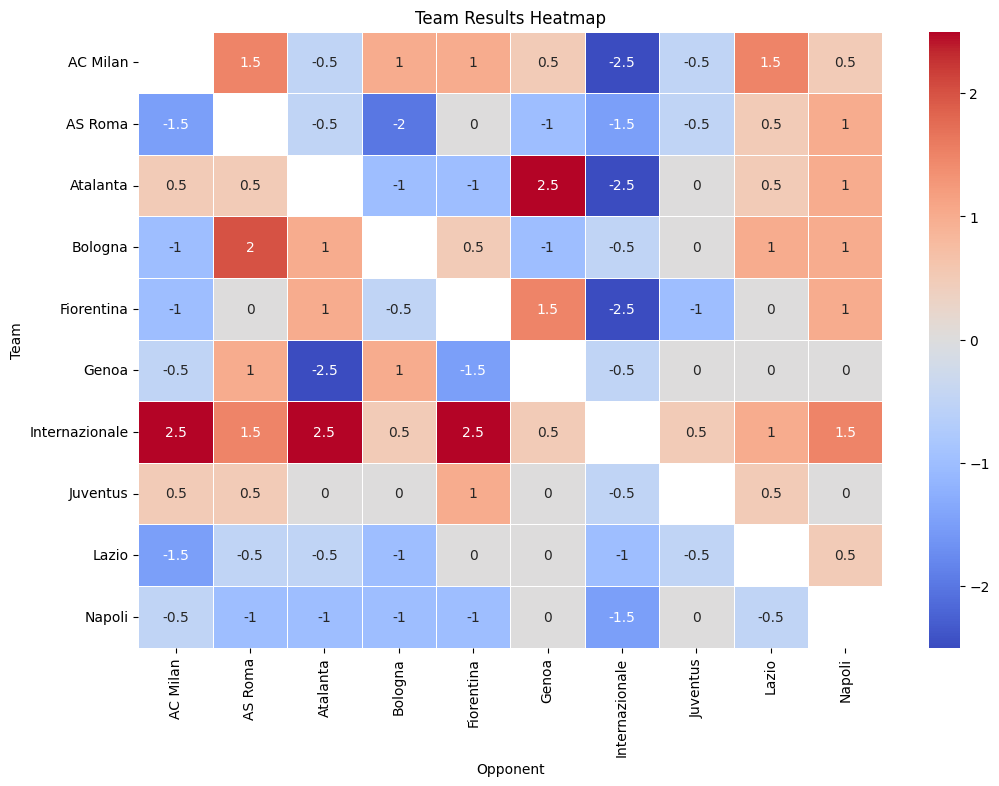

In [26]:
seria_teams = []
seria_total = {}
for index, row in seria_df.iterrows():
    team = row['Team']
    result = row['Result']
    if team not in seria_total:
        seria_total[team] = result
        seria_teams.append(team)
    else:
        seria_total[team] += result

seria_total_df = pd.DataFrame(list(seria_total.items()), columns=['Team', 'Total'])
seria_total_df = seria_total_df.sort_values(by='Total', ascending=False)
seria_top_10 = seria_total_df.head(10)
seria_top_10_teams = seria_top_10['Team'].tolist()

print(seria_top_10)
seria_top_10_match = []
for index, row in seria_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    #print(team, opponent, result)
    if team in seria_top_10_teams and opponent in seria_top_10_teams:
        seria_top_10_match.append({'Team': team, 'Opponent': opponent, 'Result': result})

seria_top_10_match_df = pd.DataFrame(seria_top_10_match)
print(seria_top_10_match_df)

create_heatmap(seria_top_10_match_df)

['AC Milan', 'AS Roma', 'Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Hellas Verona', 'Internazionale', 'Juventus', 'Lazio', 'Lecce', 'Monza', 'Napoli', 'Salernitana', 'Sassuolo', 'Torino', 'Udinese']
{'Napoli': 12.245735391002091, 'Atalanta': 13.175103460607986, 'Lazio': 11.61657928941829, 'Bologna': 12.881184359955594, 'Monza': 9.087011851385665, 'Juventus': 9.063259095244028, 'Sassuolo': 8.699278973712609, 'Fiorentina': 8.910798825664592, 'Salernitana': 7.6636601809138, 'Empoli': 7.953956320539682, 'Udinese': 7.532710986131004, 'Lecce': 7.728899444596478, 'Torino': 7.342488193115802, 'Genoa': 8.102180524380783, 'Cagliari': 7.768723329763493, 'Frosinone': 6.689618726831968, 'Hellas Verona': 6.928744901323231}
         Team     Opponent  Result  Difference
0    AC Milan  Salernitana       0   -7.663660
1    AC Milan       Torino      -2   -7.342488
2    AC Milan     Cagliari       4   -7.768723
3    AC Milan        Genoa       0   -8.102181
4    AC 

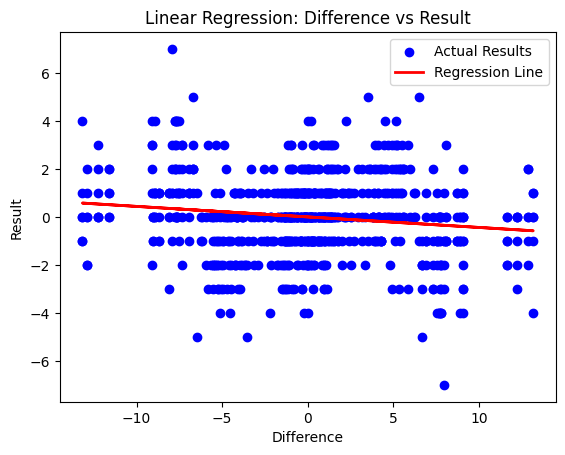

Mean Squared Error: 2.8278083626334496
R^2: 0.019555494707380605


In [27]:
seria_scores = {}
print(seria_teams)
for index, row in fw_df.iterrows():
    team = row['Team']
    score = row['Total_score']
    if team in seria_teams:
        if team not in seria_scores:
            seria_scores[team] = score
        elif team in seria_scores:
            seria_scores[team] += score
        else:
            seria_scores[team] = 0

#pl_scores_df = pd.DataFrame(pl_scores)
print(seria_scores)

seria_diff = []
for index, row in seria_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    try:
        t_score = seria_scores[team]
    except:
        t_score = 0
    try:
        o_score = seria_scores[opponent]
    except:
        o_score = 0
    diff = t_score - o_score
    seria_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})

seria_diff_df = pd.DataFrame(seria_diff)
print(seria_diff_df)

X = seria_diff_df['Difference'].values.reshape(-1, 1)
y = seria_diff_df['Result'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

plt.scatter(X, y, color='blue', label='Actual Results')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Difference')
plt.ylabel('Result')
plt.title('Linear Regression: Difference vs Result')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Serie A is not suitable for applying linear regression. So we try to apply linear regression on Serie A top 10 teams.

회귀 계수 (Slope): -0.038743075170244876
절편 (Intercept): -3.058734513691667e-18


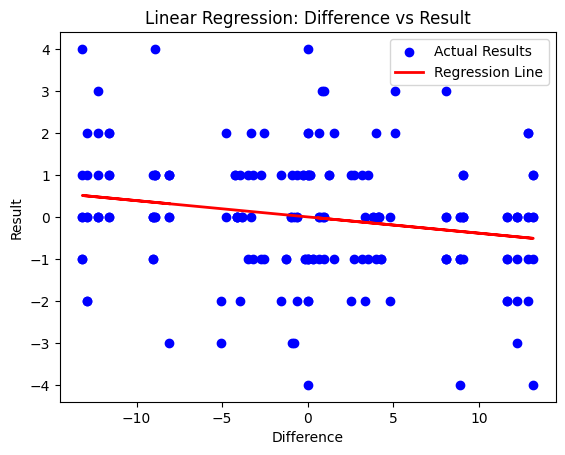

평균 제곱 오차 (MSE): 2.0307997541176896
결정 계수 (R^2): 0.043078649892188015
         Team        Opponent    Result  Difference
0    AC Milan           Genoa  0.283285   -8.102181
1    AC Milan        Juventus  0.316888   -9.063259
2    AC Milan  Internazionale -0.000000    0.000000
3    AC Milan      Fiorentina  0.311558   -8.910799
4    AC Milan           Lazio  0.406163  -11.616579
..        ...             ...       ...         ...
175    Napoli        AC Milan -0.428161   12.245735
176    Napoli      Fiorentina -0.116603    3.334937
177    Napoli         Bologna  0.022218   -0.635449
178    Napoli           Genoa -0.144875    4.143555
179    Napoli           Lazio -0.021998    0.629156

[180 rows x 4 columns]


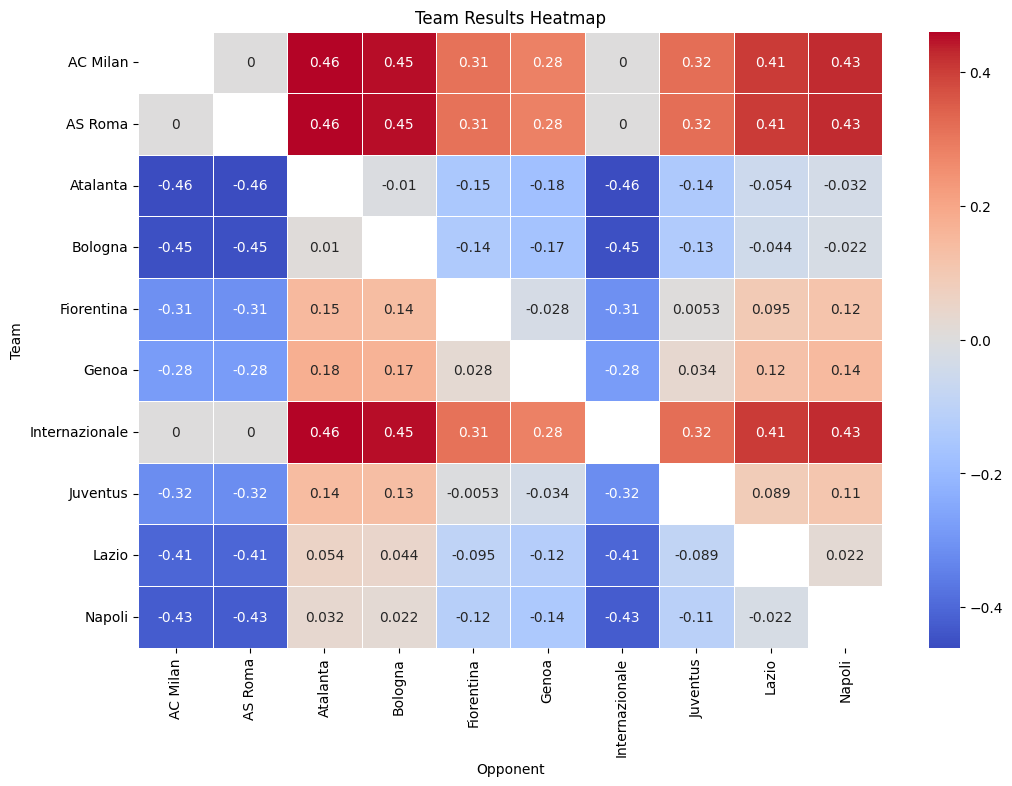

In [28]:
seria_top_10_diff = []
for index, row in seria_diff_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    diff = row['Difference']
    if team in seria_top_10_teams and opponent in seria_top_10_teams:
        seria_top_10_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
seria_top_10_diff_df = pd.DataFrame(seria_top_10_diff)
#print(pl_top_10_diff_df)
X = seria_top_10_diff_df['Difference'].values.reshape(-1, 1)
y = seria_top_10_diff_df['Result'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'회귀 계수 (Slope): {model.coef_[0]}')
print(f'절편 (Intercept): {model.intercept_}')

plt.scatter(X, y, color='blue', label='Actual Results')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Difference')
plt.ylabel('Result')
plt.title('Linear Regression: Difference vs Result')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'평균 제곱 오차 (MSE): {mse}')
print(f'결정 계수 (R^2): {r2}')

seria_regression = []
for index, row in seria_top_10_diff_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Difference'] * -0.03496405196203219
    diff = row['Difference']
    seria_regression.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
seria_regression_df = pd.DataFrame(seria_regression)
print(seria_regression_df)
create_heatmap(seria_regression_df)

Final heatmap for Serie A shows that Milan, Roma, Internazionale are both overwhelming the league and contending the Championship. However, this heatmap is based on only for top 10 teams, so that there is problem to say that all of them are dominating the league.

  Actually, initial heatmap based on real match data shows that Internazionale and Milan are performing good but Roma is not. Roma's squad performance index is very similar to them but why Roma is performing poor?

> What makes underperforming happen by comparison to similar squad?



---

#### **4-2-4. Bundesliga**  
**(The codes are similar from the prior one. Let's focus on the results below.)**

In [30]:
bundes_teams = []
bundes_total = {}
for index, row in bundes_df.iterrows():
    team = row['Team']
    result = row['Result']
    if team not in bundes_total:
        bundes_total[team] = result
        bundes_teams.append(team)
    else:
        bundes_total[team] += result

bundes_total_df = pd.DataFrame(list(bundes_total.items()), columns=['Team', 'Total'])
bundes_total_df = bundes_total_df.sort_values(by='Total', ascending=False)
bundes_top_10 = bundes_total_df.head(10)
bundes_top_10_teams = bundes_top_10['Team'].tolist()
#print(bundes_teams)
print(bundes_top_10)
bundes_top_10_match = []
for index, row in bundes_df.iterrows():
    team = row['Team']
    if team == '1. FC Union Berlin':
        team = 'Union Berlin'
    opponent = row['Opponent']
    result = row['Result']
    #print(team, opponent, result)
    if team in bundes_top_10_teams and opponent in bundes_top_10_teams:
        bundes_top_10_match.append({'Team': team, 'Opponent': opponent, 'Result': result})

bundes_top_10_match_df = pd.DataFrame(bundes_top_10_match)
print(bundes_top_10_match_df)
bundes_top_10_match_df.to_csv('bnd.csv', index=False)

#create_heatmap(bundes_top_10_match_df)

                     Team  Total
2        Bayer Leverkusen     65
3           Bayern Munich     49
14          VfB Stuttgart     39
10             RB Leipzig     38
4       Borussia Dortmund     25
6     Eintracht Frankfurt      1
13         TSG Hoffenheim      0
0   1. FC Heidenheim 1846     -5
17          Werder Bremen     -6
7             FC Augsburg    -10
                      Team               Opponent  Result
0    1. FC Heidenheim 1846             RB Leipzig      -1
1    1. FC Heidenheim 1846          Bayern Munich       1
2    1. FC Heidenheim 1846          VfB Stuttgart       0
3    1. FC Heidenheim 1846            FC Augsburg      -1
4    1. FC Heidenheim 1846    Eintracht Frankfurt      -1
..                     ...                    ...     ...
175          Werder Bremen    Eintracht Frankfurt       0
176          Werder Bremen      Borussia Dortmund      -1
177          Werder Bremen         TSG Hoffenheim      -1
178          Werder Bremen  1. FC Heidenheim 1846      -2

['1. FC Heidenheim 1846', '1. FC Union Berlin', 'Bayer Leverkusen', 'Bayern Munich', 'Borussia Dortmund', 'Borussia Monchengladbach', 'Eintracht Frankfurt', 'FC Augsburg', 'FC Cologne', 'Mainz', 'RB Leipzig', 'SC Freiburg', 'SV Darmstadt 98', 'TSG Hoffenheim', 'VfB Stuttgart', 'VfL Bochum', 'VfL Wolfsburg', 'Werder Bremen']
{'Bayern Munich': 13.621647462272135, 'TSG Hoffenheim': 12.165579897444001, 'VfB Stuttgart': 12.865037688229865, 'FC Augsburg': 9.66889293144785, 'SC Freiburg': 10.00863159779335, 'RB Leipzig': 11.888399579545782, 'Borussia Dortmund': 11.244113357210017, 'Bayer Leverkusen': 15.436076154248475, 'VfL Wolfsburg': 9.792063292853232, 'Werder Bremen': 9.804982414768649, 'VfL Bochum': 9.206902689276651}
                      Team               Opponent  Result  Difference
0    1. FC Heidenheim 1846             FC Cologne       3    0.000000
1    1. FC Heidenheim 1846            SC Freiburg       0  -10.008632
2    1. FC Heidenheim 1846                  Mainz       0    0.0

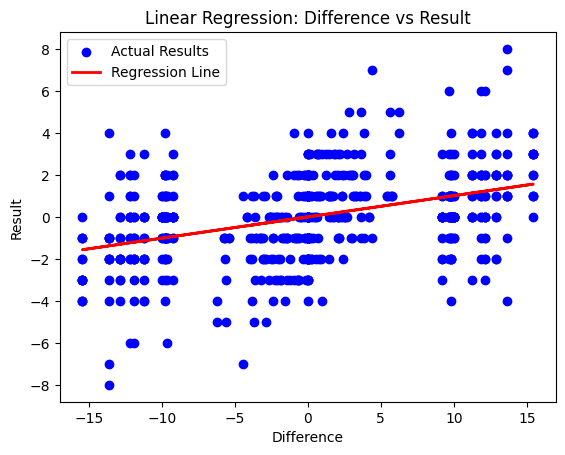

Mean Sqaured Error: 3.648653752438472
R^2: 0.16493040520106772


In [32]:
bundes_scores = {}
print(bundes_teams)
for index, row in fw_df.iterrows():
    team = row['Team']
    #print(team)
    score = row['Total_score']
    if team == 'Augsburg':
        team = 'FC Augsburg'
    elif team == 'Dortmund':
        team = 'Borussia Dortmund'
    elif team == 'Eintracht':
        team = 'Eintracht Frankfurt'
    elif team == 'Freiburg':
        team = 'SC Freiburg'
    elif team == 'Hoffenheim':
        team = 'TSG Hoffenheim'
    elif team == 'Leverkusen':
        team = 'Bayer Leverkusen'
    elif team == 'Mainz 04':
        team = 'Mainz'
    elif team == 'Stuttgart':
        team = 'VfB Stuttgart'
    elif team == 'Wolfsburg':
        team = 'VfL Wolfsburg'
    elif team == 'Bochum':
        team = 'VfL Bochum'
    elif team == 'Cologne':
        team = 'FC Cologne'
    elif team == 'Monchengladbach':
        team = 'Borussia Monchengladbach'
    elif team == 'Darmstadt':
        team = 'SV Darmstadt 98'
    elif team == '1. Union Berlin':
        team = 'Union Berlin'
    if team in bundes_teams:
        #print(team)
        if team not in bundes_scores:
            bundes_scores[team] = score
        elif team in bundes_scores:
            bundes_scores[team] += score
        else:
            bundes_scores[team] = 0

#pl_scores_df = pd.DataFrame(pl_scores)
print(bundes_scores)

bundes_diff = []
for index, row in bundes_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    try:
        t_score = bundes_scores[team]
    except:
        t_score = 0
    try:
        o_score = bundes_scores[opponent]
    except:
        o_score = 0
    diff = t_score - o_score
    bundes_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})

bundes_diff_df = pd.DataFrame(bundes_diff)
print(bundes_diff_df)

X = bundes_diff_df['Difference'].values.reshape(-1, 1)
y = bundes_diff_df['Result'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

plt.scatter(X, y, color='blue', label='Actual Results')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Difference')
plt.ylabel('Result')
plt.title('Linear Regression: Difference vs Result')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Sqaured Error: {mse}')
print(f'R^2: {r2}')

                      Team               Opponent    Result  Difference
0    1. FC Heidenheim 1846             RB Leipzig -0.848125  -11.888400
1    1. FC Heidenheim 1846          Bayern Munich -0.970840  -13.621647
2    1. FC Heidenheim 1846          VfB Stuttgart -0.917272  -12.865038
3    1. FC Heidenheim 1846            FC Augsburg -0.690984   -9.668893
4    1. FC Heidenheim 1846    Eintracht Frankfurt -0.006425    0.000000
..                     ...                    ...       ...         ...
175          Werder Bremen    Eintracht Frankfurt  0.687769    9.804982
176          Werder Bremen      Borussia Dortmund -0.108316   -1.439131
177          Werder Bremen         TSG Hoffenheim -0.173556   -2.360597
178          Werder Bremen  1. FC Heidenheim 1846  0.687769    9.804982
179          Werder Bremen          Bayern Munich -0.276646   -3.816665

[180 rows x 4 columns]


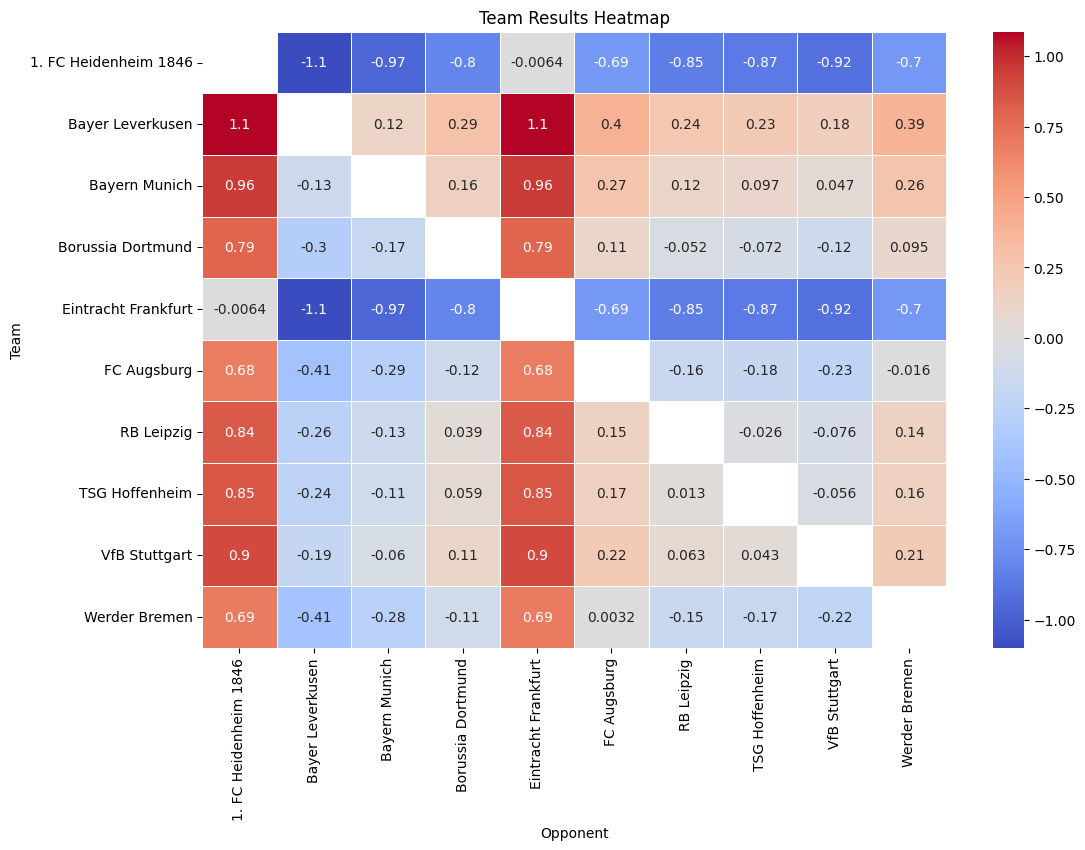

In [33]:
bundes_top_10_diff = []
for index, row in bundes_diff_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    if opponent == '1. Union Berlin':
        opponent = 'Union Berlin'
    result = row['Result']
    diff = row['Difference']
    if team in bundes_top_10_teams and opponent in bundes_top_10_teams:
        bundes_top_10_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
bundes_top_10_diff_df = pd.DataFrame(bundes_top_10_diff)
#print(pl_top_10_diff_df)

bundes_regression = []
for index, row in bundes_top_10_diff_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    if opponent == '1. Union Berlin':
        opponent = 'Union Berlin'
    result = row['Difference'] * 0.07080012976267884 - 0.006425186815792003
    diff = row['Difference']
    bundes_regression.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
bundes_regression_df = pd.DataFrame(bundes_regression)
print(bundes_regression_df)
create_heatmap(bundes_regression_df)

Final heatmap for Bundesliga shows that 2 clusters like shape. Leverkusen performs slightly well than Munich, but Stuttgart also performs well almost like Leverkusen and Munich. However, there are 3 teams that performing poor compare to other top 10 teams.

> Heidenheim, Frankfurt, Mainz may be relegated from Bundesliga top 10 teams.

> Top teams in Bundesliga may be hopeful to win the Championship than top teams in PL.  





---
#### **4-2-5. Ligue 1**  
**(The codes are similar from the prior one. Let's focus on the results below.)**

                   Team  Total
13  Paris Saint-Germain     48
0             AS Monaco     26
1                 Brest     19
5                 Lille     18
8             Marseille     11
12                 Nice     11
4                  Lens      8
14        Stade Rennais      7
17             Toulouse     -4
10          Montpellier     -5
          Team             Opponent  Result
0    AS Monaco          Montpellier       2
1    AS Monaco                Lille       1
2    AS Monaco                Brest       2
3    AS Monaco        Stade Rennais       1
4    AS Monaco  Paris Saint-Germain       0
..         ...                  ...     ...
175   Toulouse          Montpellier      -3
176   Toulouse                Brest       0
177   Toulouse                 Lens      -1
178   Toulouse            Marseille       0
179   Toulouse  Paris Saint-Germain       0

[180 rows x 3 columns]


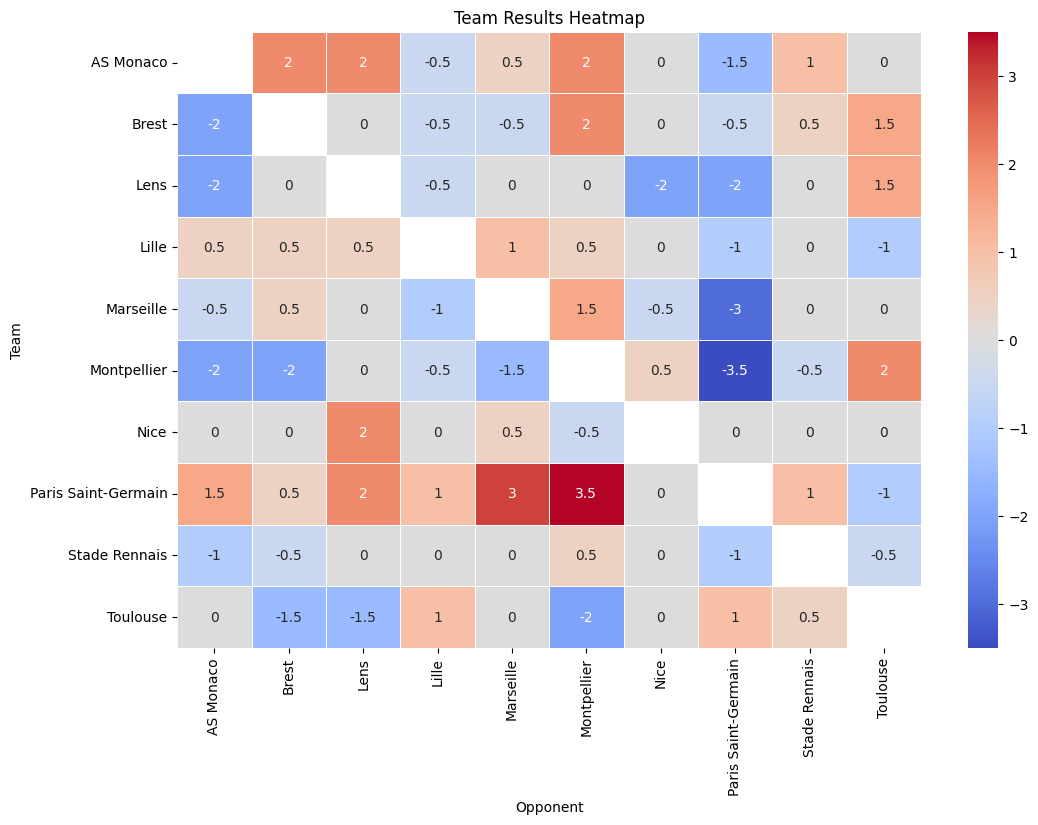

In [35]:
ligue1_teams = []
ligue1_total = {}
for index, row in ligue1_df.iterrows():
    team = row['Team']
    result = row['Result']
    if team not in ligue1_total:
        ligue1_total[team] = result
        ligue1_teams.append(team)
    else:
        ligue1_total[team] += result

ligue1_total_df = pd.DataFrame(list(ligue1_total.items()), columns=['Team', 'Total'])
ligue1_total_df = ligue1_total_df.sort_values(by='Total', ascending=False)
ligue1_top_10 = ligue1_total_df.head(10)
ligue1_top_10_teams = ligue1_top_10['Team'].tolist()

print(ligue1_top_10)
ligue1_top_10_match = []
for index, row in ligue1_df.iterrows():
    team = row['Team']
    if team == 'Monaco':
        team = "AS Monaco"
    opponent = row['Opponent']
    result = row['Result']
    #print(team, opponent, result)
    if team in ligue1_top_10_teams and opponent in ligue1_top_10_teams:
        ligue1_top_10_match.append({'Team': team, 'Opponent': opponent, 'Result': result})

ligue1_top_10_match_df = pd.DataFrame(ligue1_top_10_match)
print(ligue1_top_10_match_df)

create_heatmap(ligue1_top_10_match_df)

['AS Monaco', 'Brest', 'Clermont Foot', 'Le Havre AC', 'Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz', 'Montpellier', 'Nantes', 'Nice', 'Paris Saint-Germain', 'Stade Rennais', 'Stade de Reims', 'Strasbourg', 'Toulouse']
{'Paris Saint-Germain': 15.833568975209293, 'Nice': 11.154208904987037, 'Lens': 10.174900933691532, 'Marseille': 9.321193595089458, 'Lyon': 10.430227772935886, 'Montpellier': 10.749438818472736, 'AS Monaco': 10.206757303269356, 'Brest': 10.278084298921305, 'Lille': 10.90765951569325, 'Metz': 8.42319186680188, 'Toulouse': 8.172261942252229, 'Strasbourg': 8.387032201608065, 'Clermont Foot': 8.274832065505253, 'Lorient': 8.365959980888334, 'Nantes': 7.345510602249735}
          Team             Opponent  Result  Difference
0    AS Monaco               Nantes       4    2.861247
1    AS Monaco          Montpellier       2   -0.542682
2    AS Monaco        Clermont Foot       3    1.931925
3    AS Monaco                 Lyon      -1   -0.223470
4    AS Monaco       

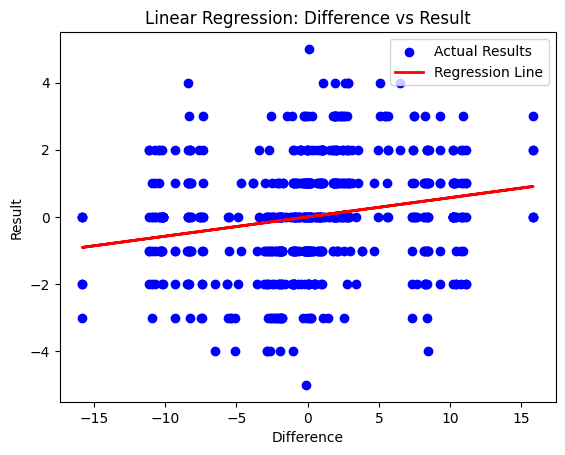

Mean Sqaured Error: 2.608830893170748
R^2: 0.042803053584833495


In [36]:
ligue1_scores = {}
print(ligue1_teams)
for index, row in fw_df.iterrows():
    team = row['Team']
    #print(team)
    score = row['Total_score']
    if team == 'Monaco':
        team = 'AS Monaco'
    elif team == 'Paris S-G':
        team = 'Paris Saint-Germain'
    elif team == 'Montpellier HSC':
        team = 'Montpellier'

    if team in ligue1_teams:
        #print(team)
        if team not in ligue1_scores:
            ligue1_scores[team] = score
        elif team in ligue1_scores:
            ligue1_scores[team] += score
        else:
            ligue1_scores[team] = 0

#pl_scores_df = pd.DataFrame(pl_scores)
print(ligue1_scores)

ligue1_diff = []
for index, row in ligue1_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Result']
    try:
        t_score = ligue1_scores[team]
    except:
        t_score = 0
    try:
        o_score = ligue1_scores[opponent]
    except:
        o_score = 0
    diff = t_score - o_score
    ligue1_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})

ligue1_diff_df = pd.DataFrame(ligue1_diff)
print(ligue1_diff_df)

X = ligue1_diff_df['Difference'].values.reshape(-1, 1)
y = ligue1_diff_df['Result'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

plt.scatter(X, y, color='blue', label='Actual Results')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Difference')
plt.ylabel('Result')
plt.title('Linear Regression: Difference vs Result')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Sqaured Error: {mse}')
print(f'R^2: {r2}')

          Team             Opponent    Result  Difference
0    AS Monaco          Montpellier -0.036363   -0.542682
1    AS Monaco                Lille -0.046918   -0.700902
2    AS Monaco                Brest -0.004919   -0.071327
3    AS Monaco        Stade Rennais  0.680728   10.206757
4    AS Monaco  Paris Saint-Germain -0.375524   -5.626812
..         ...                  ...       ...         ...
175   Toulouse          Montpellier -0.172084   -2.577177
176   Toulouse                Brest -0.140640   -2.105822
177   Toulouse                 Lens -0.133757   -2.002639
178   Toulouse            Marseille -0.076806   -1.148932
179   Toulouse  Paris Saint-Germain -0.511244   -7.661307

[180 rows x 4 columns]


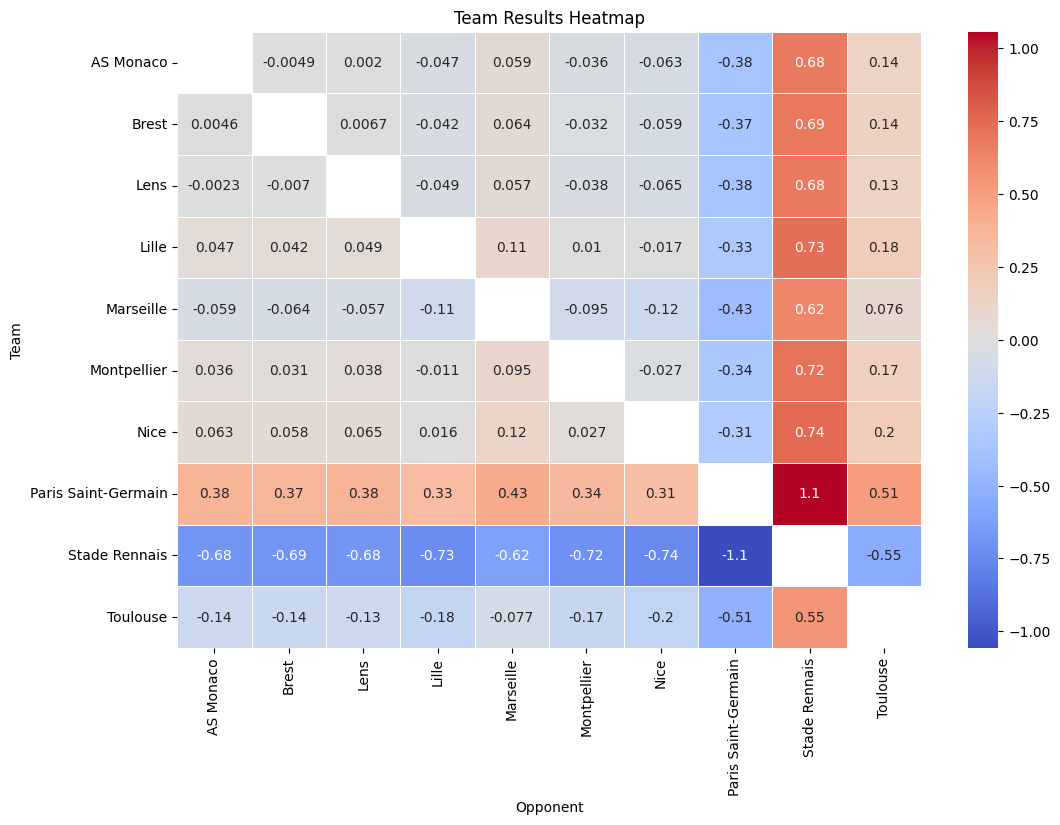

In [37]:
ligue1_top_10_diff = []
for index, row in ligue1_diff_df.iterrows():
    team = row['Team']
    if team == 'Monaco':
        team = 'AS Monaco'
    opponent = row['Opponent']
    result = row['Result']
    diff = row['Difference']
    if team in ligue1_top_10_teams and opponent in ligue1_top_10_teams:
        ligue1_top_10_diff.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
ligue1_top_10_diff_df = pd.DataFrame(ligue1_top_10_diff)
#print(pl_top_10_diff_df)

ligue1_regression = []
for index, row in ligue1_top_10_diff_df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    result = row['Difference'] * 0.0667096684508841 - 0.00016115953833044825
    diff = row['Difference']
    ligue1_regression.append({'Team': team, 'Opponent': opponent, 'Result': result, 'Difference': diff})
ligue1_regression_df = pd.DataFrame(ligue1_regression)
print(ligue1_regression_df)
create_heatmap(ligue1_regression_df)

Final heatmap for Ligue1 shows that PSG is dominating the league very obviously. However, other teams are more interesting except PSG and Stade Rennais. That teams are competing each other fiercely. We can find interesting insight from this heatmap.

> For teams in Ligue1, except for PSG, probably contending for UEFA cup qualification rather than Championship.



### **4-3. Limitation**

We performed linear regression to evaluate and try to find insights from the whole result. However, there are also significant limitation.

> Since match result data is discrete data, we cannot prove the linearity of the dataset. Actually, most of regression model's R^2 value is very low.

> Since we dealt with 3-year long data, it is not enough to standardize and normalize. Also, we cannot perform well because of promotion and relegation of each league. Because of this reason, there are some missing scores and values.







### **4-4. 👏Expectation**
Although we have significant limitations, we contructed regression model. There are several tasks we can go with for future study.

> Improving regression model. We can improve regression model by converting discrete data to continuous data, so that we can expect more reliability for our regression model.

> Get enough size of dataset. We can get enough size of dataset that provides stability of standardization and normalization.



